In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import xarray as xr
import pandas as pd
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util
# import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')


In [2]:
def cesm_correct_time(ds):
    """Given a Dataset, check for time_bnds,
       and use avg(time_bnds) to replace the time coordinate.
       Purpose is to center the timestamp on the averaging inverval.   
       NOTE: ds should have been loaded using `decode_times=False`
    """
    assert 'time_bnds' in ds
    assert 'time' in ds
    correct_time_values = ds['time_bnds'].mean(dim='nbnd')
    # copy any metadata:
    correct_time_values.attrs = ds['time'].attrs
    ds = ds.assign_coords({"time": correct_time_values})
    ds = xr.decode_cf(ds)  # decode to datetime objects
    return ds


In [3]:
# Get states outline for cartopy
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

In [4]:
'''
Function to map seasonal differences in different variables. 
Define variable choice to map out difference in as a string (varSel). 
Since we'd also like to denote clearly in the title what the difference is, pass in with diffString. 

Differences are taken as the test DS minus control, and seasonal averages
are assumed to have already been computed. 
'''
def map2d_SeasonalDifferences(ctlDS, testDS1, testDS2, testDS3, varSel, diffString1, diffString2, diffString3, locSel):
    # Get difference in variables and set cbar range 
    diffDS1 = testDS1 - ctlDS
    diffDS2 = testDS2 - ctlDS 
    diffDS3 = testDS3 - ctlDS
    
    # * Note: * Play around with coef on ranges to get a reasonable plot with enough detail 
    # Get ranges for differences 
    maxDiff   = np.nanpercentile(diffDS1[varSel].values,99.5)
    minDiff   = np.nanpercentile(diffDS1[varSel].values,0.5)
    valRange1 = np.nanmax([np.abs(maxDiff),np.abs(minDiff)])
    
    maxDiff   = np.nanpercentile(diffDS2[varSel].values,99.5)
    minDiff   = np.nanpercentile(diffDS2[varSel].values,0.5)
    valRange2 = np.nanmax([np.abs(maxDiff),np.abs(minDiff)])
    
    maxDiff   = np.nanpercentile(diffDS3[varSel].values,99.5)
    minDiff   = np.nanpercentile(diffDS3[varSel].values,0.5)
    valRange3 = np.nanmax([np.abs(maxDiff),np.abs(minDiff)])

    
#     valRange1 = 0.3   # Used for cloud fraction differences
#     valRange2 = 0.3
    #     valRange2 = 2.5  # Used to ensure consistent colorbars for TBOT and TS plots
    # * * * * * * * * * * * * * * * * * * * * * * * *  * * * * * * * * * * * *  * * * * * * * * * * * * 
    
    titleString1 = varSel+' '+diffString1
    titleString2 = varSel+' '+diffString2
    titleString3 = varSel+' '+diffString3
    
    # ----------------------------------
    # Set up figure 
    fig, axs = plt.subplots(4,4, figsize=(17, 17), 
                            facecolor='w', edgecolor='k',
                            subplot_kw={'projection':ccrs.PlateCarree()})
    #Adjust space between subplots 
    fig.subplots_adjust(hspace = 0.1,wspace = 0.1)
    #Put axs handles in array, axs 
    axs = axs.ravel()
    
    # Set range of maps 
    lonMax = np.nanmax(ctlDS.lon.values)
    lonMin = np.nanmin(ctlDS.lon.values)
    latMax = np.nanmax(ctlDS.lat.values)
    latMin = np.nanmin(ctlDS.lat.values)
    
    axs[0].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[1].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[2].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[3].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[4].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[5].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[6].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[7].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[8].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[9].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[10].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[11].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[12].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[13].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[14].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[15].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    
    # Add coastlines
    axs[0].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[1].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[2].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[3].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[4].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[5].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[6].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[7].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[8].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[9].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[10].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[11].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[12].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[13].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[14].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[15].coastlines(linewidth=0.5,edgecolor='0.25')
    
    axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[4].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[5].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[6].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[7].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[8].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[9].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[10].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[11].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[12].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[13].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[14].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[15].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    
    # Add states
    axs[0].add_feature(states_provinces, edgecolor='dimgray')
    axs[1].add_feature(states_provinces, edgecolor='dimgray')
    axs[2].add_feature(states_provinces, edgecolor='dimgray')
    axs[3].add_feature(states_provinces, edgecolor='dimgray')
    axs[4].add_feature(states_provinces, edgecolor='dimgray')
    axs[5].add_feature(states_provinces, edgecolor='dimgray')
    axs[6].add_feature(states_provinces, edgecolor='dimgray')
    axs[7].add_feature(states_provinces, edgecolor='dimgray')
    axs[8].add_feature(states_provinces, edgecolor='dimgray')
    axs[9].add_feature(states_provinces, edgecolor='dimgray')
    axs[10].add_feature(states_provinces, edgecolor='dimgray')
    axs[11].add_feature(states_provinces, edgecolor='dimgray')
    axs[12].add_feature(states_provinces, edgecolor='dimgray')
    axs[13].add_feature(states_provinces, edgecolor='dimgray')
    axs[14].add_feature(states_provinces, edgecolor='dimgray')
    axs[15].add_feature(states_provinces, edgecolor='dimgray')
    

    # ----------------------------------
    #  Plot control maps
    
    # * Note: * Play around with coef on ctlMin and ctlMax to get a reasonable plot with enough detail 
#     ctlMin = 0.85*(np.nanmin(ctlDS[varSel].values[:,:,:]))
#     ctlMax = 0.75*(np.nanmax(ctlDS[varSel].values[:,:,:]))
    ctlMin = np.nanpercentile(ctlDS[varSel].values, 10)
    ctlMax = np.nanpercentile(ctlDS[varSel].values, 99)
    
    # * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
    
    cplot0 = axs[0].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[0,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    cplot1 = axs[1].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[1,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    cplot2 = axs[2].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[2,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    cplot3 = axs[3].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[3,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    
    # Set titles
    axs[0].set_title(varSel+' (CTRL) \n'+diffDS1.season.values[0],fontsize=14)
    axs[1].set_title(diffDS1.season.values[1],fontsize=14)
    axs[2].set_title(diffDS1.season.values[2],fontsize=14)
    axs[3].set_title(diffDS1.season.values[3],fontsize=14)
    
    # Add colorbar 
    ax_position = axs[2].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
    cbar.set_label(ctrlDS_other[varSel].units,fontsize=12)
    
    # ----------------------------------
    # Plot difference #1 
    cplot4 = axs[4].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[0,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')
    cplot5 = axs[5].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[1,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')
    cplot6 = axs[6].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[2,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')
    cplot7 = axs[7].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[3,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')

    # Set titles
    axs[4].set_title(titleString1,fontsize=14)

    # Add colorbar 
    ax_position = axs[6].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot6, orientation='horizontal',cax=cbar_ax)
    cbar.set_label(ctrlDS_other[varSel].units,fontsize=12)
    
    
    # ----------------------------------
    # Plot difference #2
    cplot8 = axs[8].pcolormesh(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[0,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')
    cplot9 = axs[9].pcolormesh(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[1,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')
    cplot10 = axs[10].pcolormesh(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[2,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')
    cplot11 = axs[11].pcolormesh(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[3,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')

    # Set titles
    axs[8].set_title(titleString2,fontsize=14)

    # Add colorbar 
    ax_position = axs[10].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot10, orientation='horizontal',cax=cbar_ax)
    cbar.set_label(ctrlDS_other[varSel].units,fontsize=12)
    
    # ----------------------------------
    # Plot difference #3
    cplot12 = axs[12].pcolormesh(diffDS3.lon.values, diffDS3.lat.values, diffDS3[varSel].values[0,:,:],
                 vmin=-valRange3,vmax=valRange3,cmap='seismic')
    cplot13 = axs[13].pcolormesh(diffDS3.lon.values, diffDS3.lat.values, diffDS3[varSel].values[1,:,:],
                 vmin=-valRange3,vmax=valRange3,cmap='seismic')
    cplot14 = axs[14].pcolormesh(diffDS3.lon.values, diffDS3.lat.values, diffDS3[varSel].values[2,:,:],
                 vmin=-valRange3,vmax=valRange3,cmap='seismic')
    cplot15 = axs[15].pcolormesh(diffDS3.lon.values, diffDS3.lat.values, diffDS3[varSel].values[3,:,:],
                 vmin=-valRange3,vmax=valRange3,cmap='seismic')

    # Set titles
    axs[12].set_title(titleString3,fontsize=14)

    # Add colorbar 
    ax_position = axs[14].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot14, orientation='horizontal',cax=cbar_ax)
    cbar.set_label(ctrlDS_other[varSel].units,fontsize=12)
        
    
    # ---------------------------------------------
    # Tentatively add points of interest as dots 
    
    if locSel == 'SouthAmerica':
        # -----------------------------------------------
        # Points in South America:
        # -----------------------------------------------
        # First point: San Juaquin, Bolivia
        ilatPoint = np.where((ctrlDS_seasonal.lat.values>=-13.5) & (ctrlDS_seasonal.lat.values<=-12.5))[0]
        ilonPoint = np.where((ctrlDS_seasonal.lon.values>=294.5) & (ctrlDS_seasonal.lon.values<=296.0))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        
        
        # Second point: Campos de Júlio, Brazil
        ilatPoint = np.where((ctrlDS_seasonal.lat.values>=-14.3) & (ctrlDS_seasonal.lat.values<=-13.2))[0]
        ilonPoint = np.where((ctrlDS_seasonal.lon.values>=300.2) & (ctrlDS_seasonal.lon.values<=301.3))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())

        # Third point: ~Villa Del Rosario, Paraguay
        ilatPoint = np.where((ctrlDS_seasonal.lat.values>=-24.9) & (ctrlDS_seasonal.lat.values<=-24.0))[0]
        ilonPoint = np.where((ctrlDS_seasonal.lon.values>=302.2) & (ctrlDS_seasonal.lon.values<=303.3))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())

    elif locSel=='MidwestUS':
#         -----------------------------------------------
#         Points along Montana-Illinois line: 
#         -----------------------------------------------

        #   First point: Siox Falls
        ilatPoint = np.where((ctlDS.lat.values>=42.9) & (ctlDS.lat.values<=44.1))[0]
        ilonPoint = np.where((ctlDS.lon.values>=262.6) & (ctlDS.lon.values<=263.8))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())

        # Second point: Jordan, Montana
        ilatPoint = np.where((ctlDS.lat.values>=46.8) & (ctlDS.lat.values<=47.8))[0]
        ilonPoint = np.where((ctlDS.lon.values>=252.5) & (ctlDS.lon.values<=253.5))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())

        # Third point: Macomb/Galesburg, Illinois
        ilatPoint = np.where((ctlDS.lat.values>=40.0) & (ctlDS.lat.values<=40.9))[0]
        ilonPoint = np.where((ctlDS.lon.values>=269.1) & (ctlDS.lon.values<=270.1))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())

        # Fourth point: Fort Yates, ND
        ilatPoint = np.where((ctlDS.lat.values>=45.5) & (ctlDS.lat.values<=46.5))[0]
        ilonPoint = np.where((ctlDS.lon.values>=258.7) & (ctlDS.lon.values<=259.9))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        
    saveOption = 'True'
    if saveOption=='True':        
        figName = saveDir+'maps_'+varSel+'.png'
        plt.savefig(figName)
    
    plt.show()


In [5]:
# ilatPoint = np.where((ctrlDS_seasonal.lat.values>=-24.9) & (ctrlDS_seasonal.lat.values<=-24.0))[0]
# print(ctrlDS_seasonal.lat.values[ilatPoint])

# ilonPoint = np.where((ctrlDS_seasonal.lon.values>=303.2) & (ctrlDS_seasonal.lon.values<=304.3))[0]
# ctrlDS_seasonal.lon.values[ilonPoint]

In [6]:
# (-57.1126+360.0) % 360.0

In [5]:
'''
Function to map seasonal differences in different variables. 
Define variable choice to map out difference in as a string (varSel). 
For most variables in CLUBB, need a level specified too, so levChoice = int. 
Since we'd also like to denote clearly in the title what the difference is, pass in with diffString. 

Differences are taken as the test DS minus control, and seasonal averages
are assumed to have already been computed. 
'''
def map_SeasonalDifferences(ctlDS, testDS1, testDS2, testDS3, varSel, levChoice, diffString1, diffString2, diffString3,locSel):
    # Get difference in variables and set cbar range 
    diffDS1 = testDS1 - ctlDS
    diffDS2 = testDS2 - ctlDS
    diffDS3 = testDS3 - ctlDS
    
    # Get ranges for differences 
#     maxDiff = np.nanmax(diffDS1[varSel].values[:,levChoice,:,:])
#     minDiff = np.nanmin(diffDS1[varSel].values[:,levChoice,:,:])
#     valRange1 = 0.85*np.nanmax([np.abs(maxDiff),np.abs(minDiff)])
    
#     maxDiff = np.nanmax(diffDS2[varSel].values[:,levChoice,:,:])
#     minDiff = np.nanmin(diffDS2[varSel].values[:,levChoice,:,:])
#     valRange2 = 0.85*np.nanmax([np.abs(maxDiff),np.abs(minDiff)])
    
    maxDiff   = np.nanpercentile(diffDS1[varSel].values[:,levChoice,:,:],99)
    minDiff   = np.nanpercentile(diffDS1[varSel].values[:,levChoice,:,:],1)
    valRange1 = np.nanmax([np.abs(maxDiff),np.abs(minDiff)])
    
    maxDiff   = np.nanpercentile(diffDS2[varSel].values[:,levChoice,:,:],99)
    minDiff   = np.nanpercentile(diffDS2[varSel].values[:,levChoice,:,:],1)
    valRange2 = np.nanmax([np.abs(maxDiff),np.abs(minDiff)])
    
    maxDiff   = np.nanpercentile(diffDS3[varSel].values[:,levChoice,:,:],99)
    minDiff   = np.nanpercentile(diffDS3[varSel].values[:,levChoice,:,:],1)
    valRange3 = np.nanmax([np.abs(maxDiff),np.abs(minDiff)])
    
    titleString1 = varSel+' '+diffString1
    titleString2 = varSel+' '+diffString2
    titleString3 = varSel+' '+diffString3
    
    # ----------------------------------
    # Set up figure 
    fig, axs = plt.subplots(4,4, figsize=(17, 17), 
                            facecolor='w', edgecolor='k',
                            subplot_kw={'projection':ccrs.PlateCarree()})
    #Adjust space between subplots 
    fig.subplots_adjust(hspace = 0.1,wspace = 0.1)
    #Put axs handles in array, axs 
    axs = axs.ravel()
    
    # Set range of maps 
    lonMax = np.nanmax(ctlDS.lon.values)
    lonMin = np.nanmin(ctlDS.lon.values)
    latMax = np.nanmax(ctlDS.lat.values)
    latMin = np.nanmin(ctlDS.lat.values)

    axs[0].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[1].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[2].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[3].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[4].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[5].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[6].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[7].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[8].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[9].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[10].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[11].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[12].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[13].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[14].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    axs[15].set_extent([lonMin,lonMax,latMin,latMax], crs=ccrs.PlateCarree())
    
    # Add coastlines
    axs[0].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[1].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[2].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[3].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[4].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[5].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[6].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[7].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[8].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[9].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[10].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[11].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[12].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[13].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[14].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[15].coastlines(linewidth=0.5,edgecolor='0.25')
    
    axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[4].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[5].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[6].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[7].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[8].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[9].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[10].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[11].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[12].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[13].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[14].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[15].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    
    # Add states
    axs[0].add_feature(states_provinces, edgecolor='dimgray')
    axs[1].add_feature(states_provinces, edgecolor='dimgray')
    axs[2].add_feature(states_provinces, edgecolor='dimgray')
    axs[3].add_feature(states_provinces, edgecolor='dimgray')
    axs[4].add_feature(states_provinces, edgecolor='dimgray')
    axs[5].add_feature(states_provinces, edgecolor='dimgray')
    axs[6].add_feature(states_provinces, edgecolor='dimgray')
    axs[7].add_feature(states_provinces, edgecolor='dimgray')
    axs[8].add_feature(states_provinces, edgecolor='dimgray')
    axs[9].add_feature(states_provinces, edgecolor='dimgray')
    axs[10].add_feature(states_provinces, edgecolor='dimgray')
    axs[11].add_feature(states_provinces, edgecolor='dimgray')
    axs[12].add_feature(states_provinces, edgecolor='dimgray')
    axs[13].add_feature(states_provinces, edgecolor='dimgray')
    axs[14].add_feature(states_provinces, edgecolor='dimgray')
    axs[15].add_feature(states_provinces, edgecolor='dimgray')


    # ----------------------------------
    #  Plot control maps
    
    # * Note: * Play around with coef on ctlMin and ctlMax to get a reasonable plot with enough detail 
#     ctlMin = 0.95*(np.nanmin(ctlDS[varSel].values[:,levChoice,:,:]))
#     ctlMax = 0.85*(np.nanmax(ctlDS[varSel].values[:,levChoice,:,:]))
    ctlMin = np.nanpercentile(ctlDS[varSel].values[:,levChoice,:,:], 10)
    ctlMax = np.nanpercentile(ctlDS[varSel].values[:,levChoice,:,:], 95)
    # * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
    
    cplot0 = axs[0].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[0,levChoice,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    cplot1 = axs[1].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[1,levChoice,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    cplot2 = axs[2].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[2,levChoice,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    cplot3 = axs[3].pcolormesh(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[3,levChoice,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    
    # Set titles
    axs[0].set_title(varSel+' (CTRL) \n'+diffDS1.season.values[0],fontsize=14)
    axs[1].set_title(diffDS1.season.values[1],fontsize=14)
    axs[2].set_title(diffDS1.season.values[2],fontsize=14)
    axs[3].set_title(diffDS1.season.values[3],fontsize=14)
    
    # Add colorbar 
    ax_position = axs[2].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
#    cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)
    cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)

    
    # ----------------------------------
    # Plot difference #1 
    cplot4 = axs[4].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[0,levChoice,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')
    cplot5 = axs[5].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[1,levChoice,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')
    cplot6 = axs[6].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[2,levChoice,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')
    cplot7 = axs[7].pcolormesh(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[3,levChoice,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')

    # Set titles
    axs[4].set_title(titleString1,fontsize=14)

    # Add colorbar 
    ax_position = axs[6].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot6, orientation='horizontal',cax=cbar_ax)
    cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)

    
    
    # ----------------------------------
    # Plot difference #2
    cplot8 = axs[8].pcolormesh(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[0,levChoice,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')
    cplot9 = axs[9].pcolormesh(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[1,levChoice,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')
    cplot10 = axs[10].pcolormesh(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[2,levChoice,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')
    cplot11 = axs[11].pcolormesh(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[3,levChoice,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')

    # Set titles
    axs[8].set_title(titleString2,fontsize=14)

    # Add colorbar 
    ax_position = axs[10].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot10, orientation='horizontal',cax=cbar_ax)
    cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)

        
    # ----------------------------------
    # Plot difference #3
    cplot12 = axs[12].pcolormesh(diffDS3.lon.values, diffDS3.lat.values, diffDS3[varSel].values[0,levChoice,:,:],
                 vmin=-valRange3,vmax=valRange3,cmap='seismic')
    cplot13 = axs[13].pcolormesh(diffDS3.lon.values, diffDS3.lat.values, diffDS3[varSel].values[1,levChoice,:,:],
                 vmin=-valRange3,vmax=valRange3,cmap='seismic')
    cplot14 = axs[14].pcolormesh(diffDS3.lon.values, diffDS3.lat.values, diffDS3[varSel].values[2,levChoice,:,:],
                 vmin=-valRange3,vmax=valRange3,cmap='seismic')
    cplot15 = axs[15].pcolormesh(diffDS3.lon.values, diffDS3.lat.values, diffDS3[varSel].values[3,levChoice,:,:],
                 vmin=-valRange3,vmax=valRange3,cmap='seismic')

    # Set titles
    axs[12].set_title(titleString2,fontsize=14)

    # Add colorbar 
    ax_position = axs[14].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot14, orientation='horizontal',cax=cbar_ax)
    cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)
    
    
    # ---------------------------------------------
    # Tentatively add points of interest as dots 
    
    if locSel == 'SouthAmerica':
        # -----------------------------------------------
        # Points in South America:
        # -----------------------------------------------
        # First point: San Juaquin, Bolivia
        ilatPoint = np.where((ctrlDS_seasonal.lat.values>=-13.5) & (ctrlDS_seasonal.lat.values<=-12.5))[0]
        ilonPoint = np.where((ctrlDS_seasonal.lon.values>=294.5) & (ctrlDS_seasonal.lon.values<=296.0))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        
        
        # Second point: Campos de Júlio, Brazil
        ilatPoint = np.where((ctrlDS_seasonal.lat.values>=-14.3) & (ctrlDS_seasonal.lat.values<=-13.2))[0]
        ilonPoint = np.where((ctrlDS_seasonal.lon.values>=300.2) & (ctrlDS_seasonal.lon.values<=301.3))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())

        # Third point: ~Villa Del Rosario, Paraguay
        ilatPoint = np.where((ctrlDS_seasonal.lat.values>=-24.9) & (ctrlDS_seasonal.lat.values<=-24.0))[0]
        ilonPoint = np.where((ctrlDS_seasonal.lon.values>=302.2) & (ctrlDS_seasonal.lon.values<=303.3))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())

    elif locSel=='MidwestUS':
#         -----------------------------------------------
#         Points along Montana-Illinois line: 
#         -----------------------------------------------

        #   First point: Siox Falls
        ilatPoint = np.where((ctlDS.lat.values>=42.9) & (ctlDS.lat.values<=44.1))[0]
        ilonPoint = np.where((ctlDS.lon.values>=262.6) & (ctlDS.lon.values<=263.8))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())

        # Second point: Jordan, Montana
        ilatPoint = np.where((ctlDS.lat.values>=46.8) & (ctlDS.lat.values<=47.8))[0]
        ilonPoint = np.where((ctlDS.lon.values>=252.5) & (ctlDS.lon.values<=253.5))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())

        # Third point: Macomb/Galesburg, Illinois
        ilatPoint = np.where((ctlDS.lat.values>=40.0) & (ctlDS.lat.values<=40.9))[0]
        ilonPoint = np.where((ctlDS.lon.values>=269.1) & (ctlDS.lon.values<=270.1))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())

        # Fourth point: Fort Yates, ND
        ilatPoint = np.where((ctlDS.lat.values>=45.5) & (ctlDS.lat.values<=46.5))[0]
        ilonPoint = np.where((ctlDS.lon.values>=258.7) & (ctlDS.lon.values<=259.9))[0]
        axs[5].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[6].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[9].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[10].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[13].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        axs[14].plot(ctlDS.lon.values[ilonPoint],
                    ctlDS.lat.values[ilatPoint],'k.',
                    markersize=12,
                    transform=ccrs.PlateCarree())
        
    saveOption = 'True'
    if saveOption=='True':
        figName = saveDir+'maps_'+varSel+'_lev'+str(levChoice)+'.png'
        plt.savefig(figName)
    
    plt.show()


## Read in CLUBB moments 

In [6]:
# Set directory to save figures in
# saveDir = '/Users/mdfowler/Documents/Analysis/CLASP/ZetaIssue/figs/SouthAmerica/'
# locSel  = 'SouthAmerica'


saveDir = '/Users/mdfowler/Documents/Analysis/CLASP/ZetaIssue/figs/MidwestUS/'
locSel  = 'MidwestUS'


In [7]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/ZetaIssue/zetaTests_gobal/'

controlFile = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_cntl.003.cam.h0.0002-0010_clubbVars.nc'
# controlFile = dataDir+'f.e21.F2000climo.f09_f09_mg17.cntl_defaultAndreOptions.001.cam.h0.0002-0005_clubbVars.nc'
# zbotFile    = dataDir+'f.e21.F2000climo.f09_f09_mg17.zconstEQzbot_ReduceCoef.002.cam.h0.0002-00005_clubbVars.nc'
lvaryFile   = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth.002.cam.h0.0002-0005_clubbVars.nc'
wtsar2File  = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth_2wstars.001.cam.h0.0002-0005_clubbVars.nc'
wstarRvrsFile = dataDir + 'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth_2wstarsReverse.001.cam.h0.0002-0010_clubbVars.nc'

lvaryFile2  = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth.002.cam.h0.0006-0010_clubbVars.nc'
wstar2File2 = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth_2wstars.001.cam.h0.0006-0010_clubbVars.nc'

with xr.open_dataset(controlFile, decode_times=False) as ctrlDS: 
    ctrlDS = cesm_correct_time(ctrlDS)
    
# with xr.open_dataset(zbotFile,decode_times=False) as zbotDS: 
#     zbotDS = cesm_correct_time(zbotDS)

with xr.open_dataset(lvaryFile,decode_times=False) as lvaryDS: 
    lvaryDS = cesm_correct_time(lvaryDS)
    
with xr.open_dataset(lvaryFile2,decode_times=False) as lvaryDS2: 
    lvaryDS2 = cesm_correct_time(lvaryDS2)
    
    
with xr.open_dataset(wtsar2File,decode_times=False) as wstar2DS: 
    wstar2DS = cesm_correct_time(wstar2DS)
    
with xr.open_dataset(wstar2File2,decode_times=False) as wstar2DS2: 
    wstar2DS2 = cesm_correct_time(wstar2DS2)
    

with xr.open_dataset(wstarRvrsFile, decode_times=False) as wstarRvrsDS: 
    wstarRvrsDS = cesm_correct_time(wstarRvrsDS)
    
wstar2DS = xr.concat([wstar2DS,wstar2DS2], dim='time')
lvaryDS  = xr.concat([lvaryDS, lvaryDS2], dim='time')
    

In [9]:
if locSel == 'SouthAmerica': 
    # Focus in on the South America region
    ilat = np.where( (ctrlDS.lat.values>=-36) & (ctrlDS.lat.values<=7) )[0]
    ilon = np.where( (ctrlDS.lon.values>=256.0) & (ctrlDS.lon.values<=340.0) )[0]
    
elif locSel =='MidwestUS':
    ilat = np.where( (ctrlDS.lat.values>=35) & (ctrlDS.lat.values<=53) )[0]
    ilon = np.where( (ctrlDS.lon.values>=240.0) & (ctrlDS.lon.values<=275.0) )[0]
    

ctrlDS      = ctrlDS.isel(lon=ilon,  lat=ilat)
lvaryDS     = lvaryDS.isel(lon=ilon, lat=ilat)
wstar2DS    = wstar2DS.isel(lon=ilon, lat=ilat)
wstarRvrsDS = wstarRvrsDS.isel(lon=ilon, lat=ilat)

    

In [20]:
controlFile_otherVars = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_cntl.003.cam.h0.0002-0010_otherVars.nc'
# controlFile_otherVars = dataDir+'f.e21.F2000climo.f09_f09_mg17.cntl_defaultAndreOptions.001.cam.h0.0002-0005_otherVars.nc'
#zbotFile_otherVars    = dataDir+'f.e21.F2000climo.f09_f09_mg17.zconstEQzbot_ReduceCoef.002.cam.h0.0002-0005_otherVars.nc'
lvaryFile_otherVars   = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth.002.cam.h0.0002-0005_otherVars.nc'
wtsar2File_otherVars  = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth_2wstars.001.cam.h0.0002-0005_otherVars.nc'
wstarRvrsFile_otherVars  = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth_2wstarsReverse.001.cam.h0.0002-0010_otherVars.nc'

lvaryFile2_otherVars  = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth.002.cam.h0.0006-0010_otherVars.nc'
wstar2File2_otherVars = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth_2wstars.001.cam.h0.0006-0010_otherVars.nc'

with xr.open_dataset(controlFile_otherVars, decode_times=False) as ctrlDS_other: 
    ctrlDS_other = cesm_correct_time(ctrlDS_other)
    
    
# with xr.open_dataset(zbotFile_otherVars,decode_times=False) as zbotDS_other: 
#     zbotDS_other = cesm_correct_time(zbotDS_other)


with xr.open_dataset(lvaryFile_otherVars,decode_times=False) as lvaryDS_other: 
    lvaryDS_other = cesm_correct_time(lvaryDS_other)
# Add TS to lvarDS_other:
lvaryFile_TS   = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth.002.cam.h0.0002-0005_TS.nc'
with xr.open_dataset(lvaryFile_TS,decode_times=False) as lvaryDS_TS: 
    lvaryDS_TS = cesm_correct_time(lvaryDS_TS)
lvaryDS_other['TS'] = lvaryDS_TS.TS
    
with xr.open_dataset(lvaryFile2_otherVars,decode_times=False) as lvaryDS_other2: 
    lvaryDS_other2 = cesm_correct_time(lvaryDS_other2)
    

with xr.open_dataset(wtsar2File_otherVars,decode_times=False) as wstar2DS_other: 
    wstar2DS_other = cesm_correct_time(wstar2DS_other)

with xr.open_dataset(wstar2File2_otherVars,decode_times=False) as wstar2DS_other2: 
    wstar2DS_other2 = cesm_correct_time(wstar2DS_other2)
    
    
with xr.open_dataset(wstarRvrsFile_otherVars, decode_times=False) as wstarRvrsDS_other: 
    wstarRvrsDS_other = cesm_correct_time(wstarRvrsDS_other)
    
    
lvaryDS_other  = xr.concat([lvaryDS_other, lvaryDS_other2], dim='time')
wstar2DS_other = xr.concat([wstar2DS_other, wstar2DS_other2], dim='time')


Add TS and RELHUM to variables contained in "otherVars"

In [21]:
# controlFile_RH = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_cntl.002.cam.h0.0002-0005_RH.nc'
# zbotFile_RH    = dataDir+'f.e21.F2000climo.f09_f09_mg17.zconstEQzbot_ReduceCoef.002.cam.h0.0002-0005_RH.nc'
lvaryFile_RH   = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth.002.cam.h0.0002-0005_RH.nc'

# with xr.open_dataset(controlFile_RH, decode_times=False) as ctrlDS_RH: 
#     ctrlDS_RH = cesm_correct_time(ctrlDS_RH)
    
# with xr.open_dataset(zbotFile_RH,decode_times=False) as zbotDS_RH: 
#     zbotDS_RH = cesm_correct_time(zbotDS_RH)

with xr.open_dataset(lvaryFile_RH,decode_times=False) as lvaryDS_RH: 
    lvaryDS_RH = cesm_correct_time(lvaryDS_RH)
    
# ctrlDS_other['RELHUM'] = ctrlDS_RH.RELHUM
# zbotDS_other['RELHUM'] = zbotDS_RH.RELHUM
# lvaryDS_other['RELHUM'] = lvaryDS_RH.RELHUM


Figured out some other vars we want to look at, so adding them to the DS's above here:

In [22]:
controlFile_other2 = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_cntl.003.cam.h0.0002-0010_otherVarsV2.nc'
lvaryFile_other2   = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth.002.cam.h0.0002-0005_otherVarsV2.nc'
wstar2File_other2  = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth_2wstars.001.cam.h0.0002-0005_otherVarsV2.nc'
wstarRvrsFile_other2 = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth_2wstarsReverse.001.cam.h0.0002-0010_otherVarsV2.nc'

lvaryFile_other2_2  = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth.002.cam.h0.0006-0010_otherVarsV2.nc'
wstar2File_other2_2 = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth_2wstars.001.cam.h0.0006-0010_otherVarsV2.nc'

with xr.open_dataset(controlFile_other2, decode_times=False) as ctrlDS_other2: 
    ctrlDS_other2 = cesm_correct_time(ctrlDS_other2)
    

with xr.open_dataset(lvaryFile_other2, decode_times=False) as lvaryDS_other2: 
    lvaryDS_other2 = cesm_correct_time(lvaryDS_other2)
    
with xr.open_dataset(lvaryFile_other2_2, decode_times=False) as lvaryDS_other2_2: 
    lvaryDS_other2_2 = cesm_correct_time(lvaryDS_other2_2)

lvaryDS_other2['RELHUM'] = lvaryDS_RH.RELHUM    
    
    
with xr.open_dataset(wstar2File_other2, decode_times=False) as wstar2DS_other2: 
    wstar2DS_other2 = cesm_correct_time(wstar2DS_other2)
    
with xr.open_dataset(wstar2File_other2_2, decode_times=False) as wstar2DS_other2_2: 
    wstar2DS_other2_2 = cesm_correct_time(wstar2DS_other2_2)
    
wstar2DS_other2_2['RELHUM'] = wstar2DS_other2.RELHUM
wstar2DS_other2 = xr.concat([wstar2DS_other2, wstar2DS_other2_2], dim='time')


with xr.open_dataset(wstarRvrsFile_other2, decode_times=False) as wstarRvrsDS_other2: 
    wstarRvrsDS_other2 = cesm_correct_time(wstarRvrsDS_other2)

# Merge with appropriate datasets 
ctrlDS['WPTHVP_CLUBB']   = ctrlDS_other2.WPTHVP_CLUBB
lvaryDS['WPTHVP_CLUBB']  = lvaryDS_other2.WPTHVP_CLUBB
wstar2DS['WPTHVP_CLUBB'] = wstar2DS_other2.WPTHVP_CLUBB
wstarRvrsDS['WPTHVP_CLUBB'] = wstarRvrsDS_other2.WPTHVP_CLUBB

ctrlDS_other   = xr.merge([ctrlDS_other,   ctrlDS_other2])
lvaryDS_other  = xr.merge([lvaryDS_other,  lvaryDS_other2])
wstar2DS_other = xr.merge([wstar2DS_other, wstar2DS_other2])
wstarRvrsDS_other = xr.merge([wstarRvrsDS_other, wstarRvrsDS_other2])


In [23]:
if locSel == 'SouthAmerica': 
    # Focus in on the South America region
    ilat = np.where( (ctrlDS_other.lat.values>=-36) & (ctrlDS_other.lat.values<=7) )[0]
    ilon = np.where( (ctrlDS_other.lon.values>=256.0) & (ctrlDS_other.lon.values<=340.0) )[0]

elif locSel=='MidwestUS':
    ilat = np.where( (ctrlDS_other.lat.values>=35) & (ctrlDS_other.lat.values<=53) )[0]
    ilon = np.where( (ctrlDS_other.lon.values>=240.0) & (ctrlDS_other.lon.values<=275.0) )[0]
    
ctrlDS_other       = ctrlDS_other.isel(lon=ilon,  lat=ilat)
lvaryDS_other      = lvaryDS_other.isel(lon=ilon, lat=ilat)
wstar2DS_other     = wstar2DS_other.isel(lon=ilon, lat=ilat)
wstarRvrsDS_other  = wstarRvrsDS_other.isel(lon=ilon, lat=ilat)
    
    

Seasonal average:


In [24]:
# Calculate seasonal averages
ctrlDS_seasonal      = ctrlDS.groupby('time.season').mean('time')
lvaryDS_seasonal     = lvaryDS.groupby('time.season').mean('time')
wstar2DS_seasonal    = wstar2DS.groupby('time.season').mean('time')
wstarRvrsDS_seasonal = wstarRvrsDS.groupby('time.season').mean('time')

ctrlDSother_seasonal      = ctrlDS_other.groupby('time.season').mean('time')
lvaryDSother_seasonal     = lvaryDS_other.groupby('time.season').mean('time')
wstar2DSother_seasonal    = wstar2DS_other.groupby('time.season').mean('time')
wstarRvrsDSother_seasonal = wstarRvrsDS_other.groupby('time.season').mean('time')



## Plot maps

### Other variables

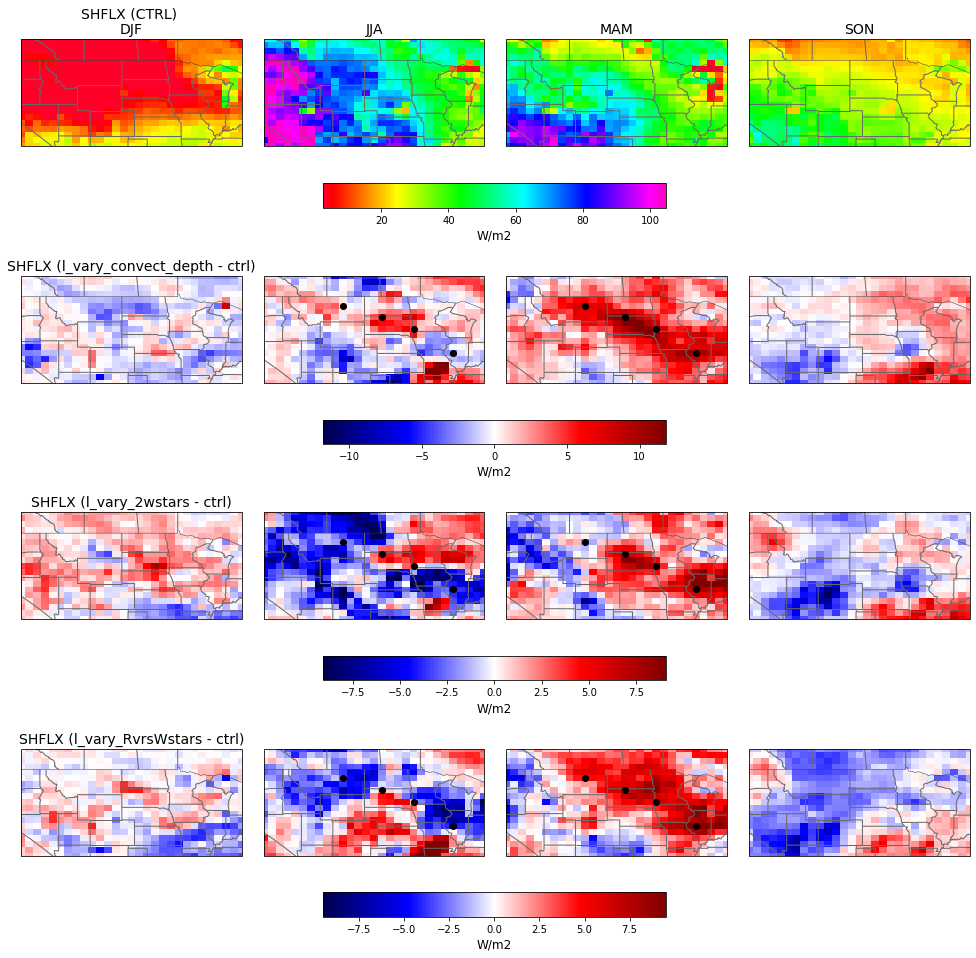

In [26]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'SHFLX', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)


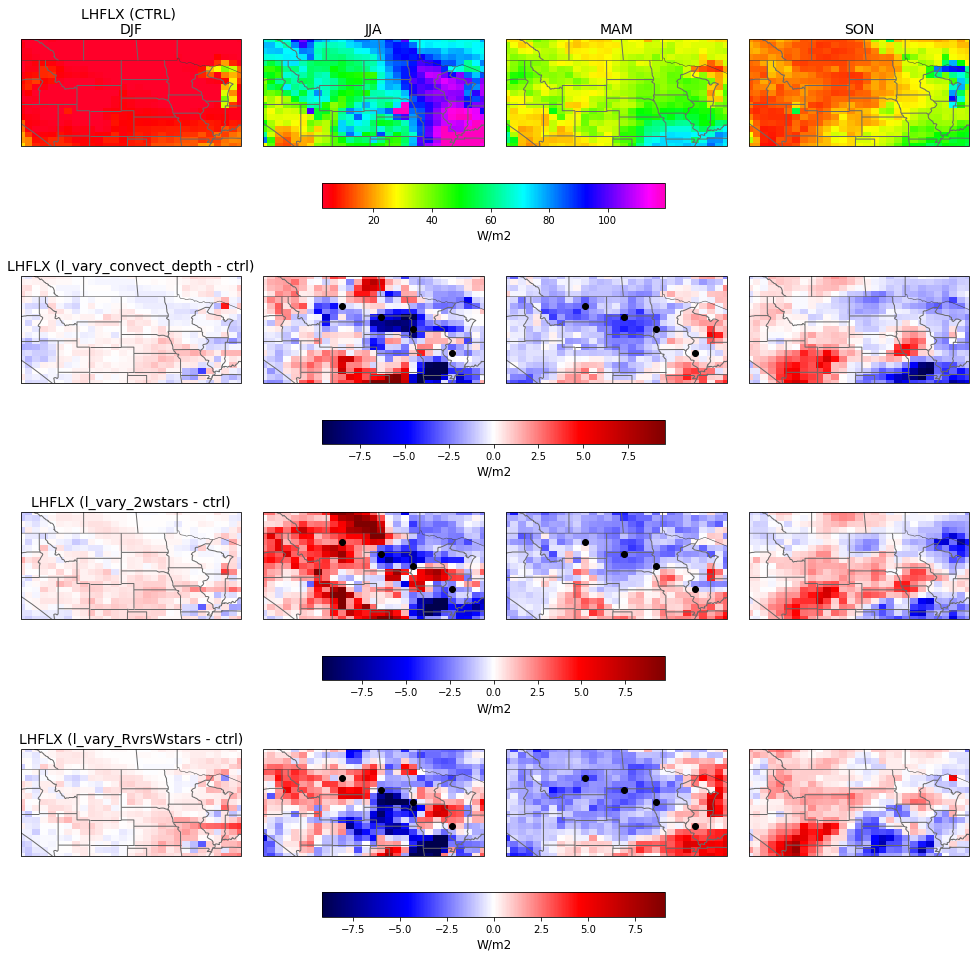

In [27]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'LHFLX', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)

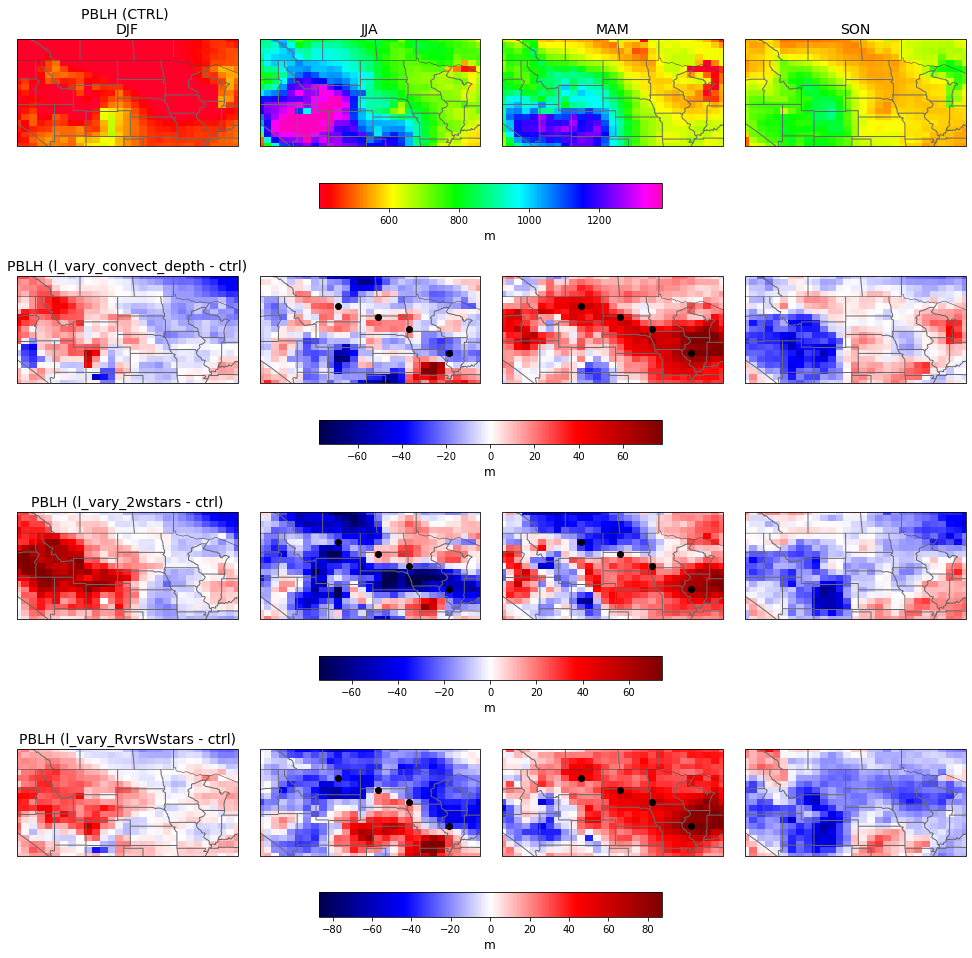

In [28]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'PBLH', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)

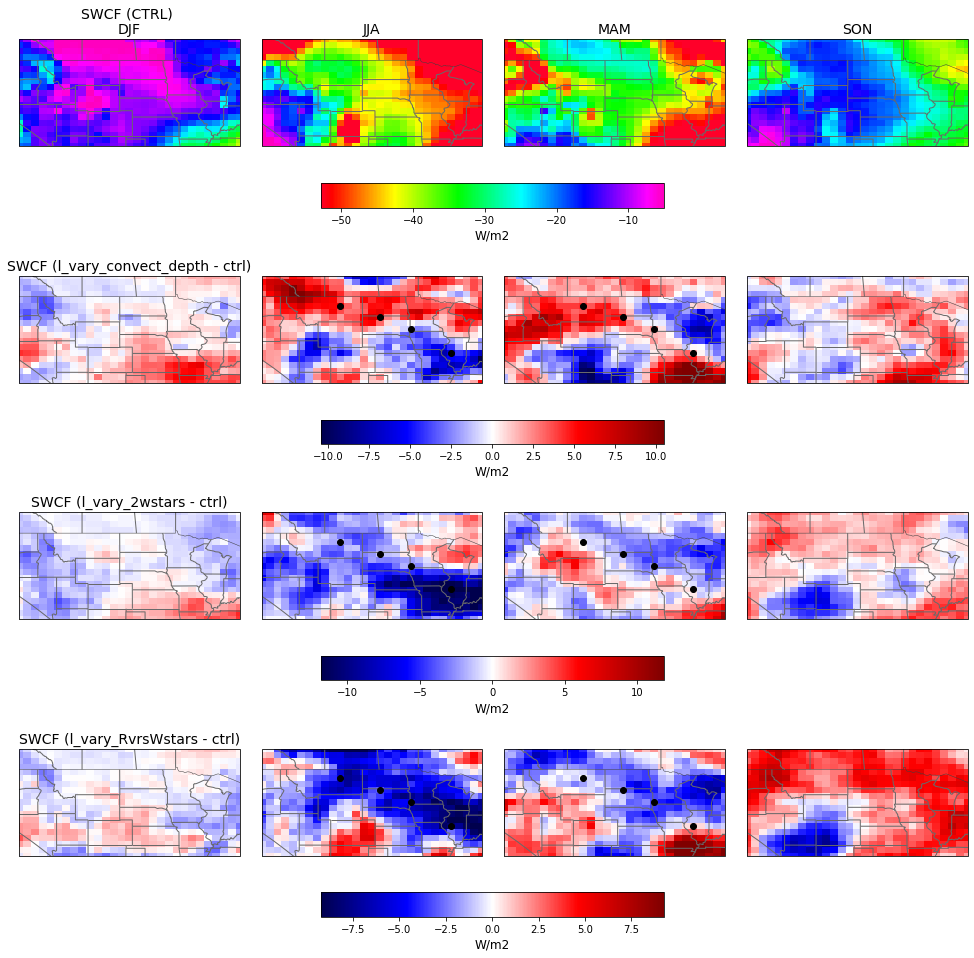

In [29]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'SWCF', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)


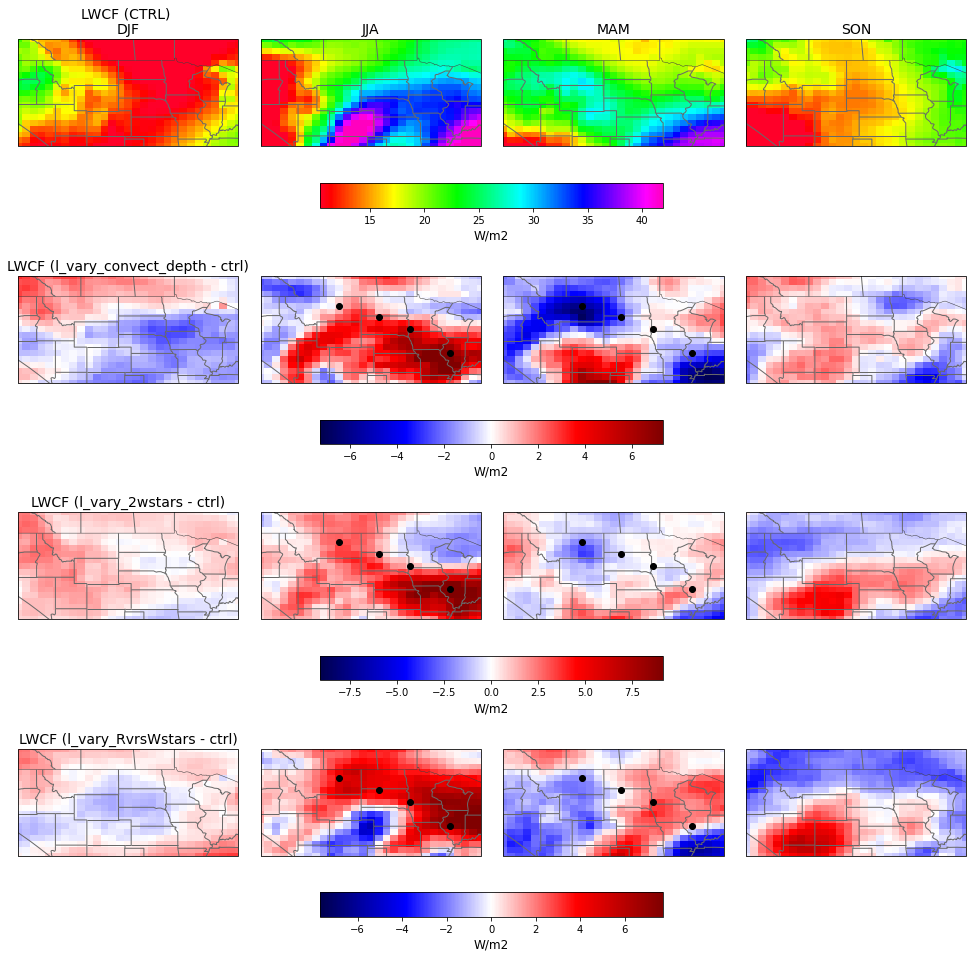

In [30]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'LWCF', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)



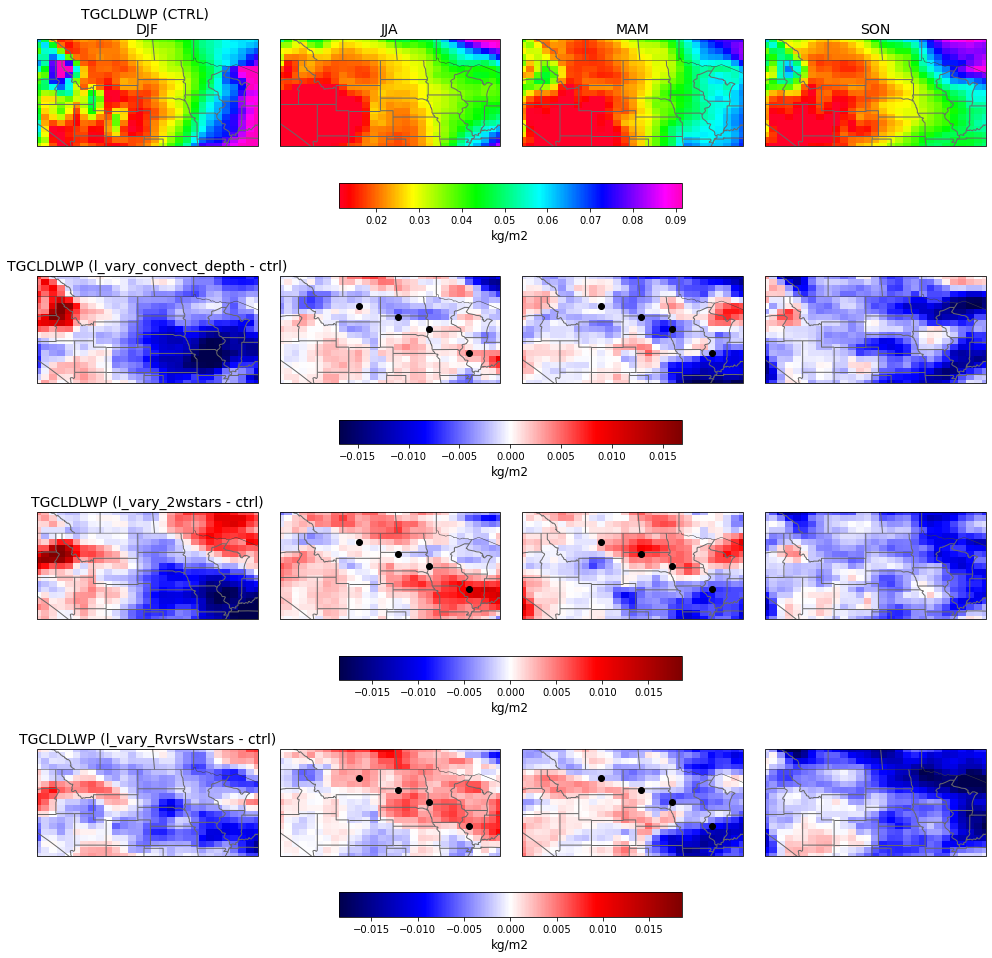

In [31]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'TGCLDLWP', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)



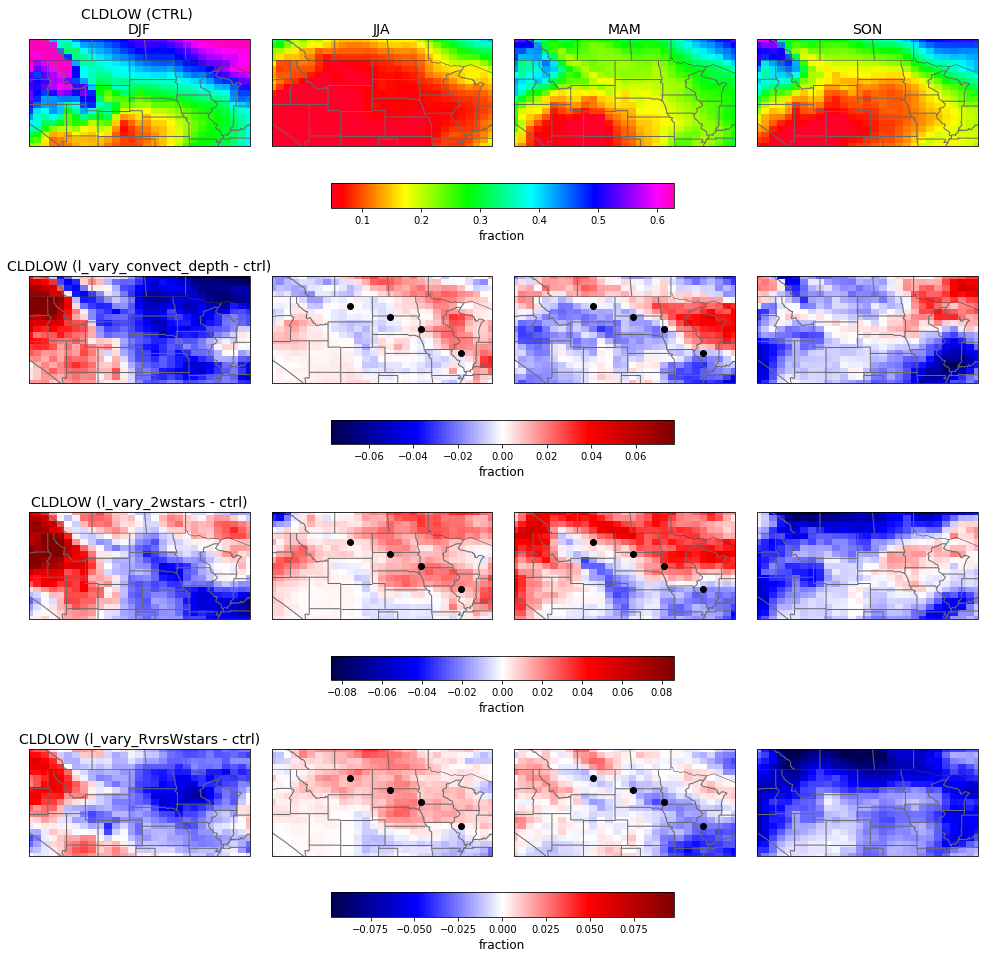

In [32]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'CLDLOW', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)




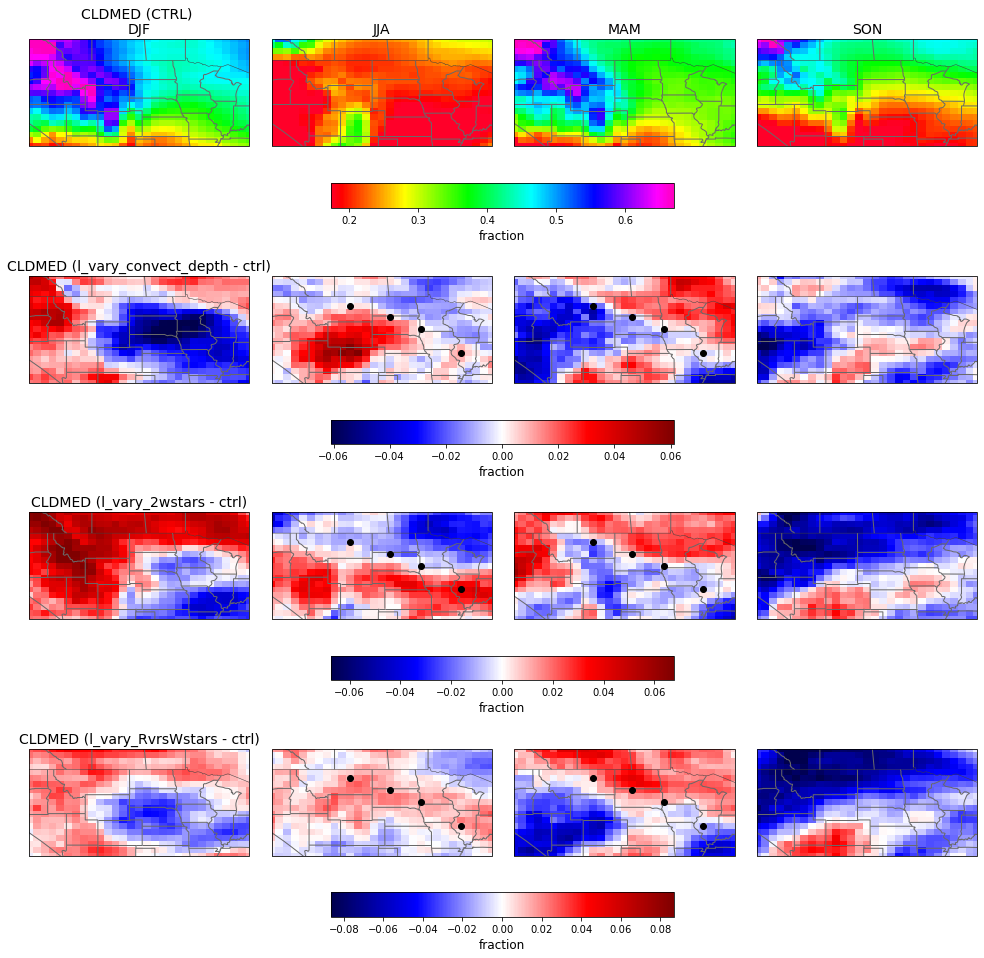

In [33]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'CLDMED', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)




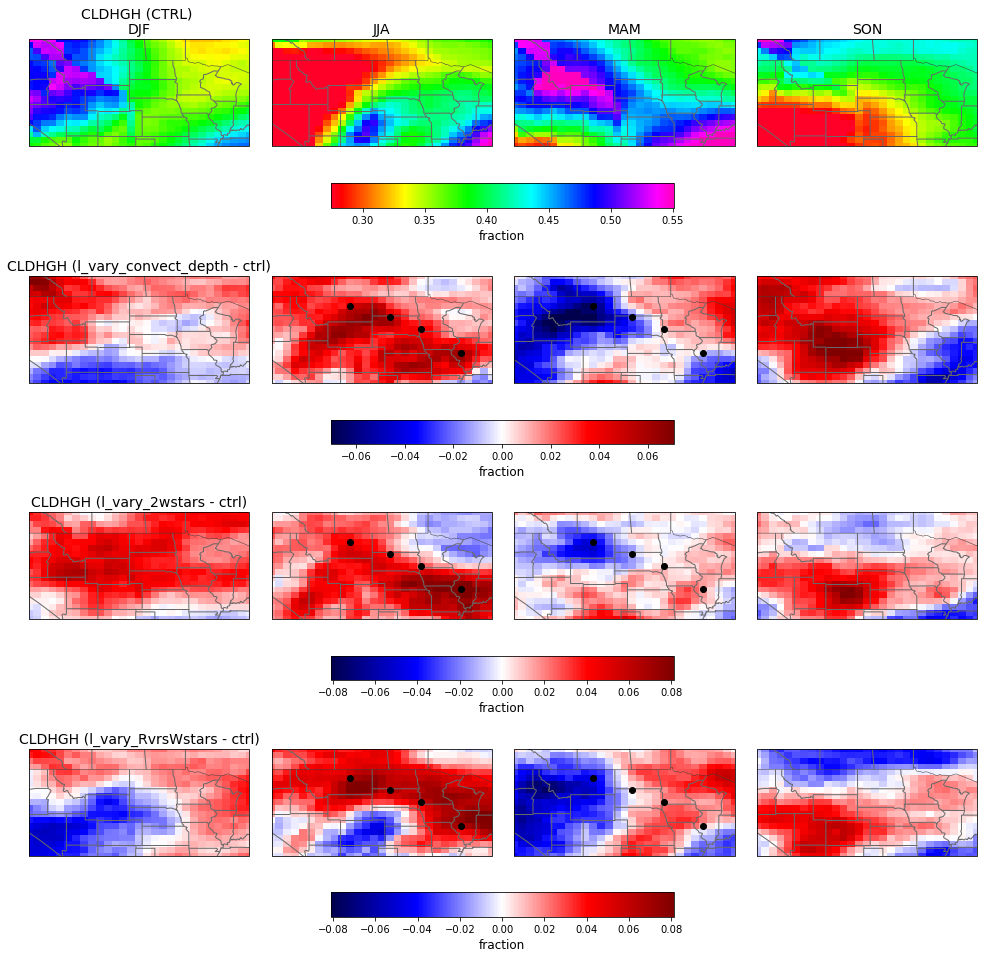

In [34]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'CLDHGH', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)




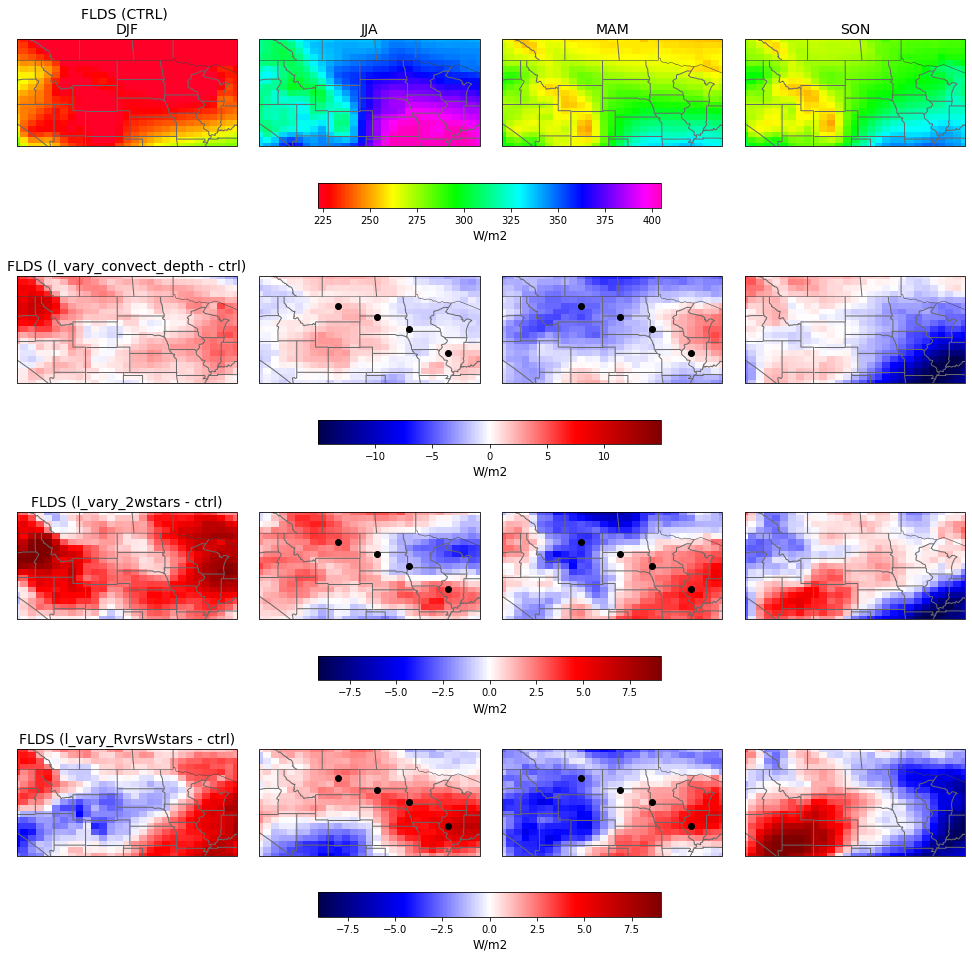

In [35]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'FLDS', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)


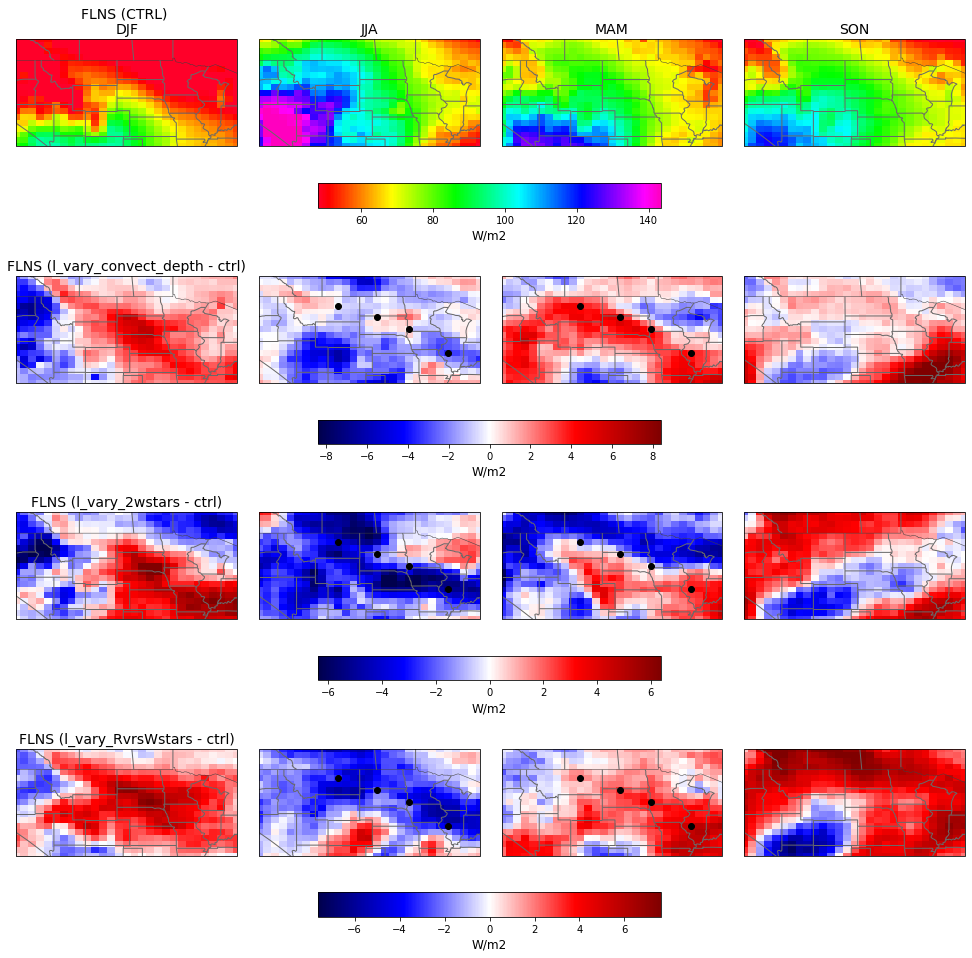

In [36]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'FLNS', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)


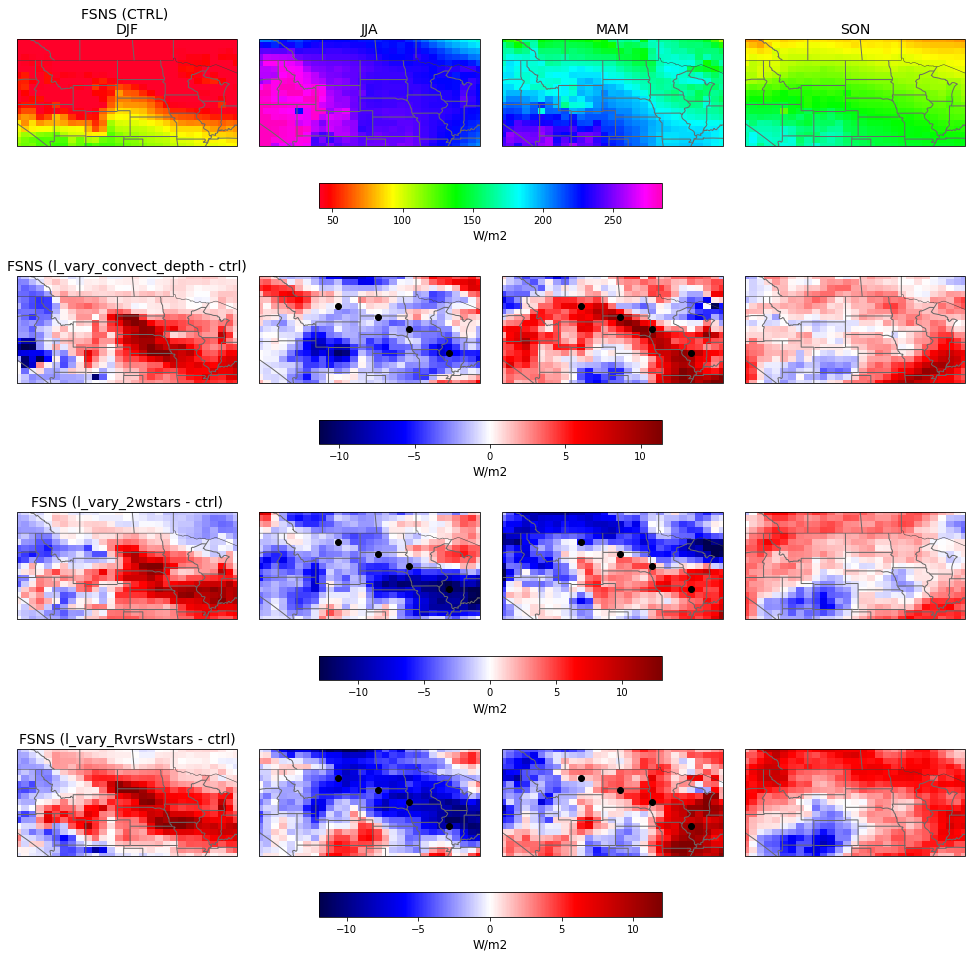

In [37]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'FSNS', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)



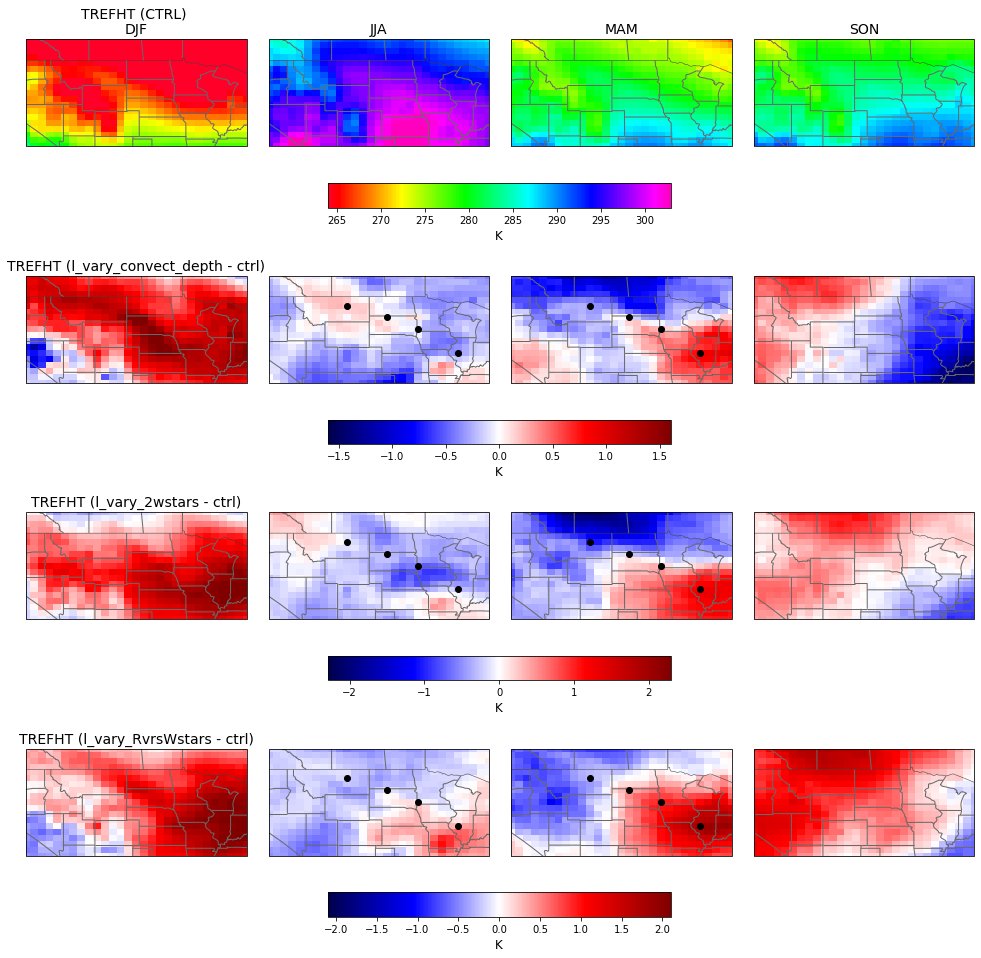

In [38]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'TREFHT', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)



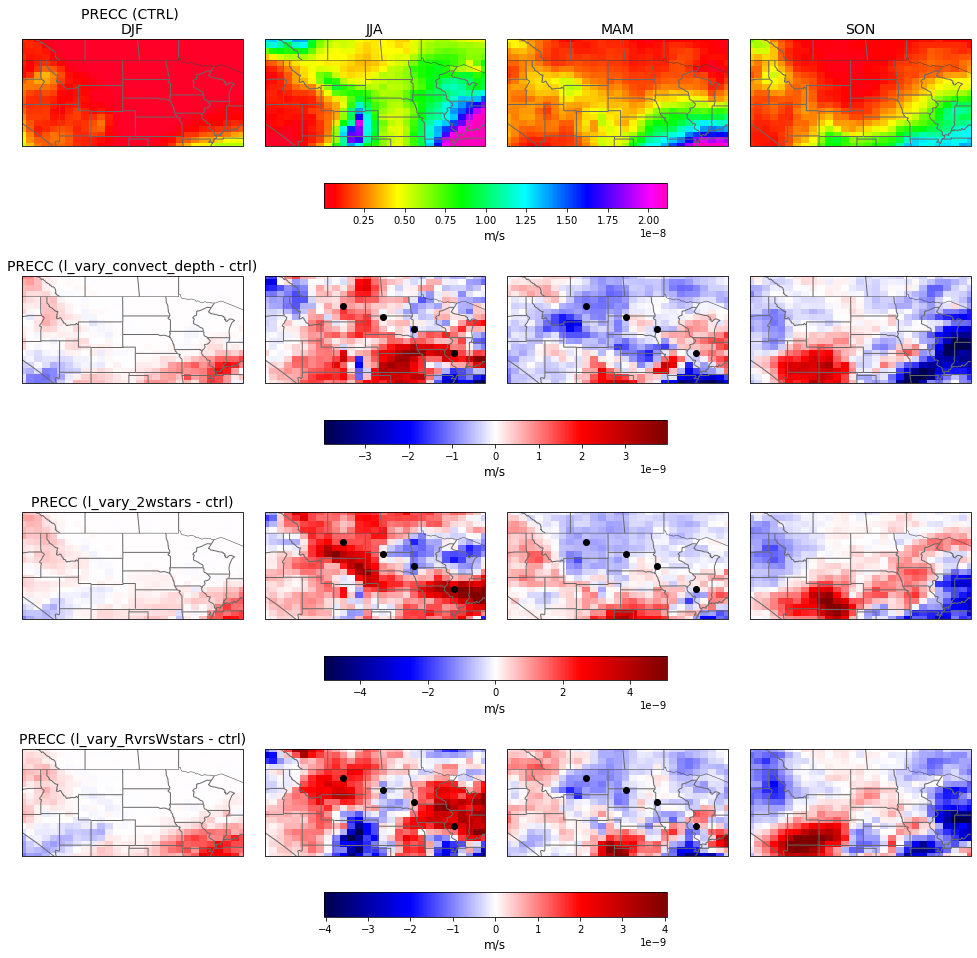

In [39]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'PRECC', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)



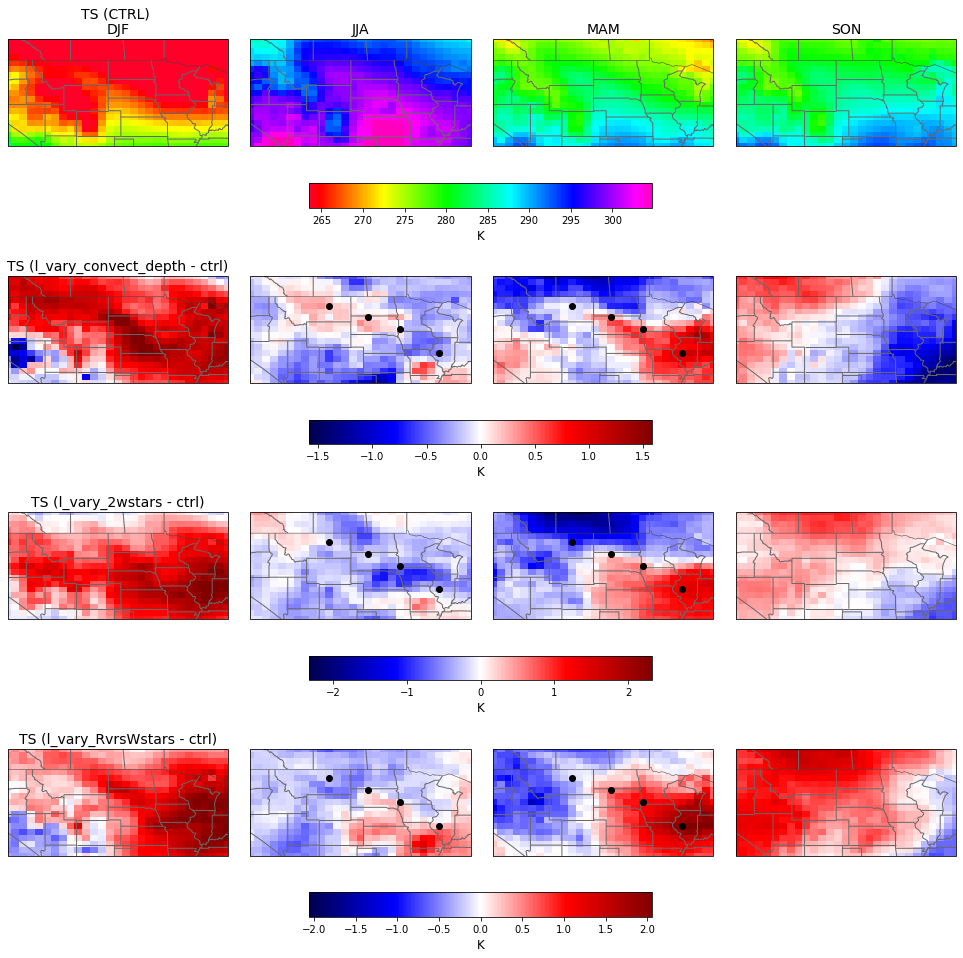

In [40]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'TS', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)



In [41]:
## Also take a look at TBOT and (TBOT-TS)
ctrlDSother_seasonal['TBOT']   = ctrlDSother_seasonal['T'].isel(lev=-1)
lvaryDSother_seasonal['TBOT']  = lvaryDSother_seasonal['T'].isel(lev=-1)
wstar2DSother_seasonal['TBOT']  = wstar2DSother_seasonal['T'].isel(lev=-1)
wstarRvrsDSother_seasonal['TBOT']  = wstarRvrsDSother_seasonal['T'].isel(lev=-1)

ctrlDSother_seasonal['TBOT-TS']  = ctrlDSother_seasonal['TBOT'] - ctrlDSother_seasonal['TS']
lvaryDSother_seasonal['TBOT-TS'] = lvaryDSother_seasonal['TBOT'] - lvaryDSother_seasonal['TS']
wstar2DSother_seasonal['TBOT-TS'] = wstar2DSother_seasonal['TBOT'] - wstar2DSother_seasonal['TS']
wstarRvrsDSother_seasonal['TBOT-TS'] = wstarRvrsDSother_seasonal['TBOT'] - wstarRvrsDSother_seasonal['TS']

# For labeling purposes, also put into ctrlDS_other
ctrlDS_other['TBOT'] = ctrlDSother_seasonal['T'].isel(lev=-1)
ctrlDS_other['TBOT-TS']  = ctrlDS_other['TBOT'] - ctrlDS_other['TS']
ctrlDS_other['TBOT'].attrs['units'] = 'K'
ctrlDS_other['TBOT-TS'].attrs['units'] = 'K'


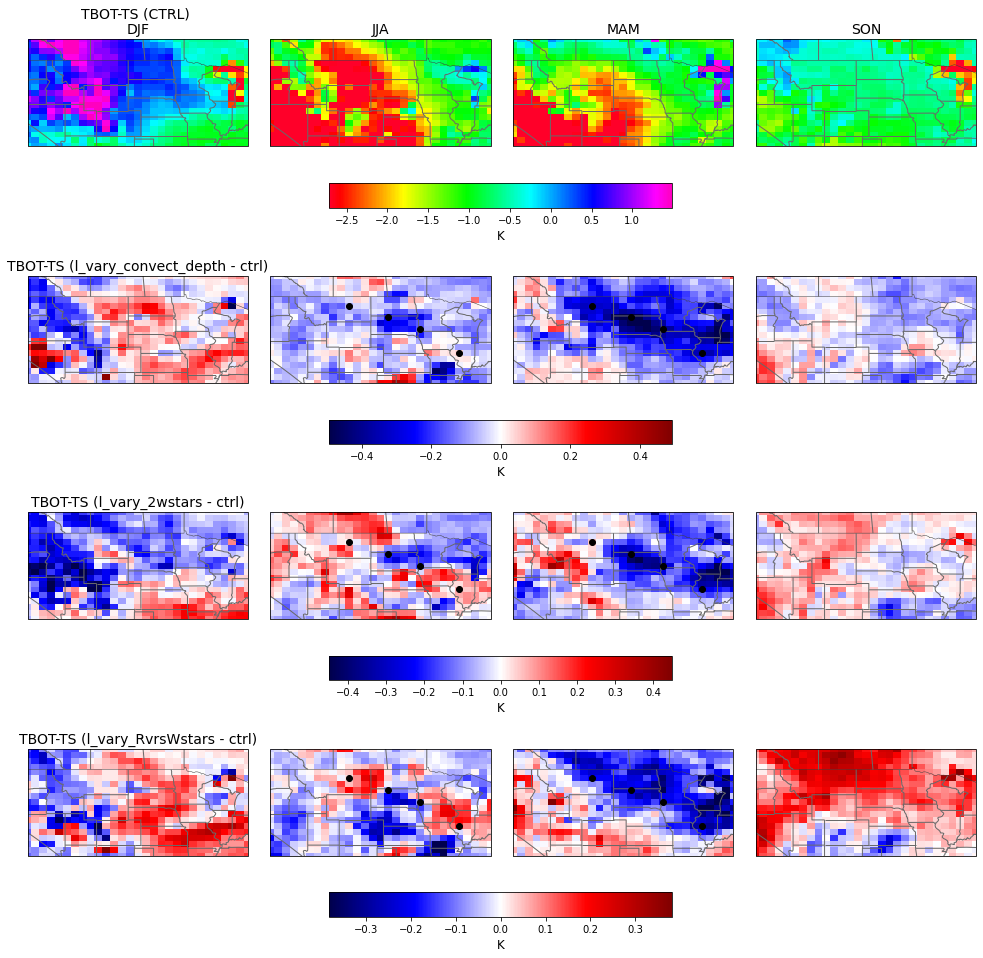

In [42]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'TBOT-TS', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)



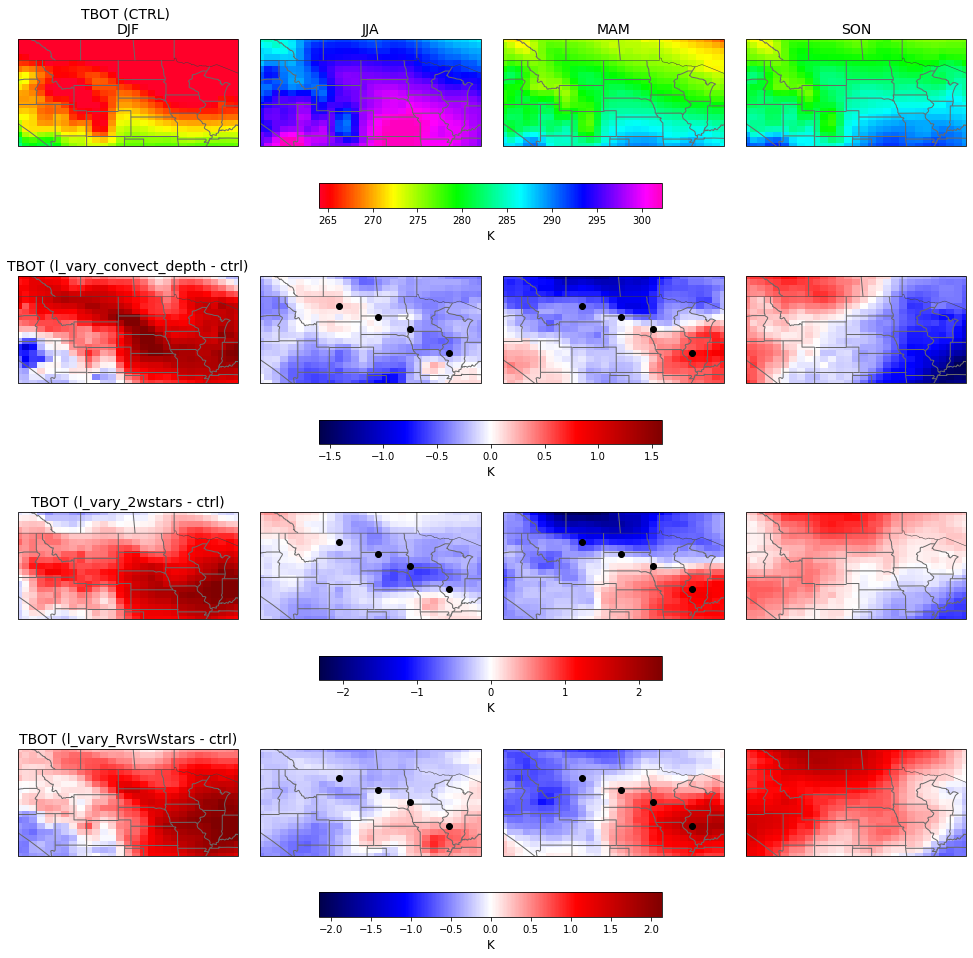

In [43]:
map2d_SeasonalDifferences(ctrlDSother_seasonal, 
                          lvaryDSother_seasonal, 
                          wstar2DSother_seasonal,
                          wstarRvrsDSother_seasonal,
                         'TBOT', 
                         '(l_vary_convect_depth - ctrl)',
                         '(l_vary_2wstars - ctrl)',
                         '(l_vary_RvrsWstars - ctrl)',
                         locSel)



### CLUBB Variables

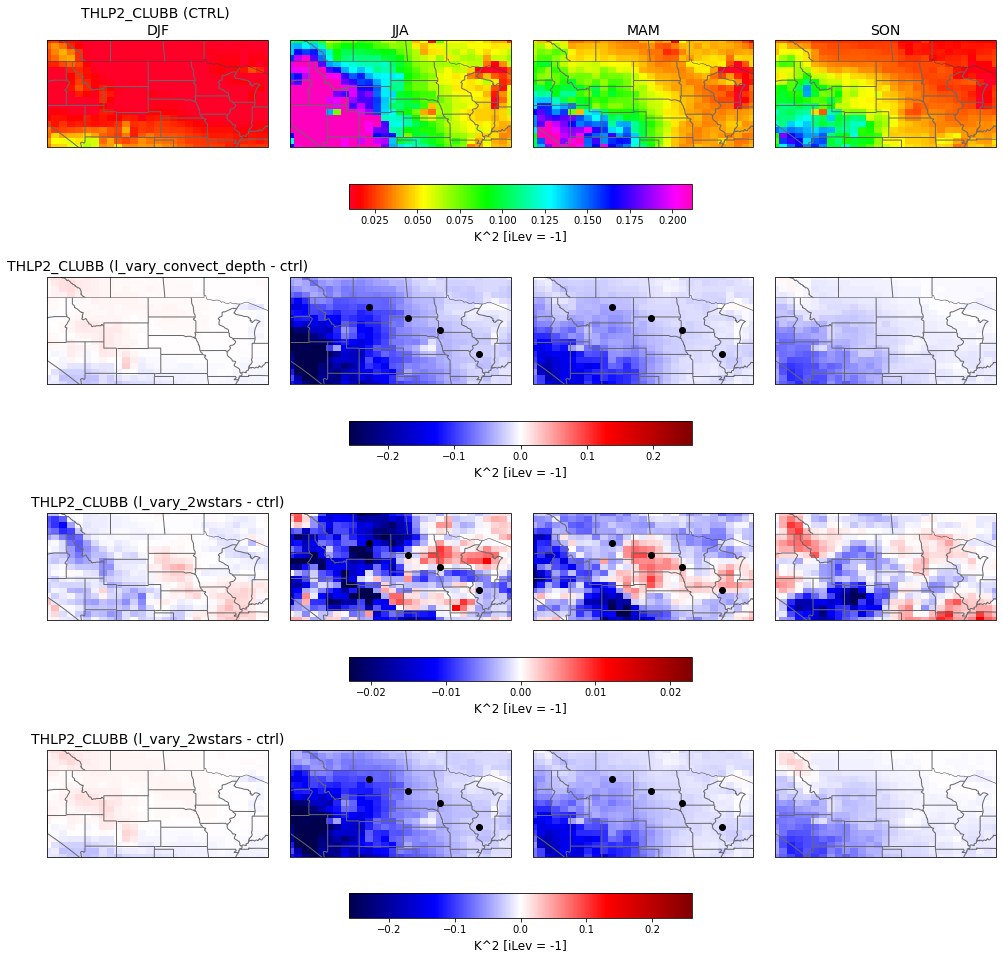

In [44]:
map_SeasonalDifferences(ctrlDS_seasonal, 
                        lvaryDS_seasonal, 
                        wstar2DS_seasonal,
                        wstarRvrsDS_seasonal,
                        'THLP2_CLUBB', -1, 
                        '(l_vary_convect_depth - ctrl)',
                        '(l_vary_2wstars - ctrl)',
                        '(l_vary_RvrsWstars - ctrl)',
                         locSel)



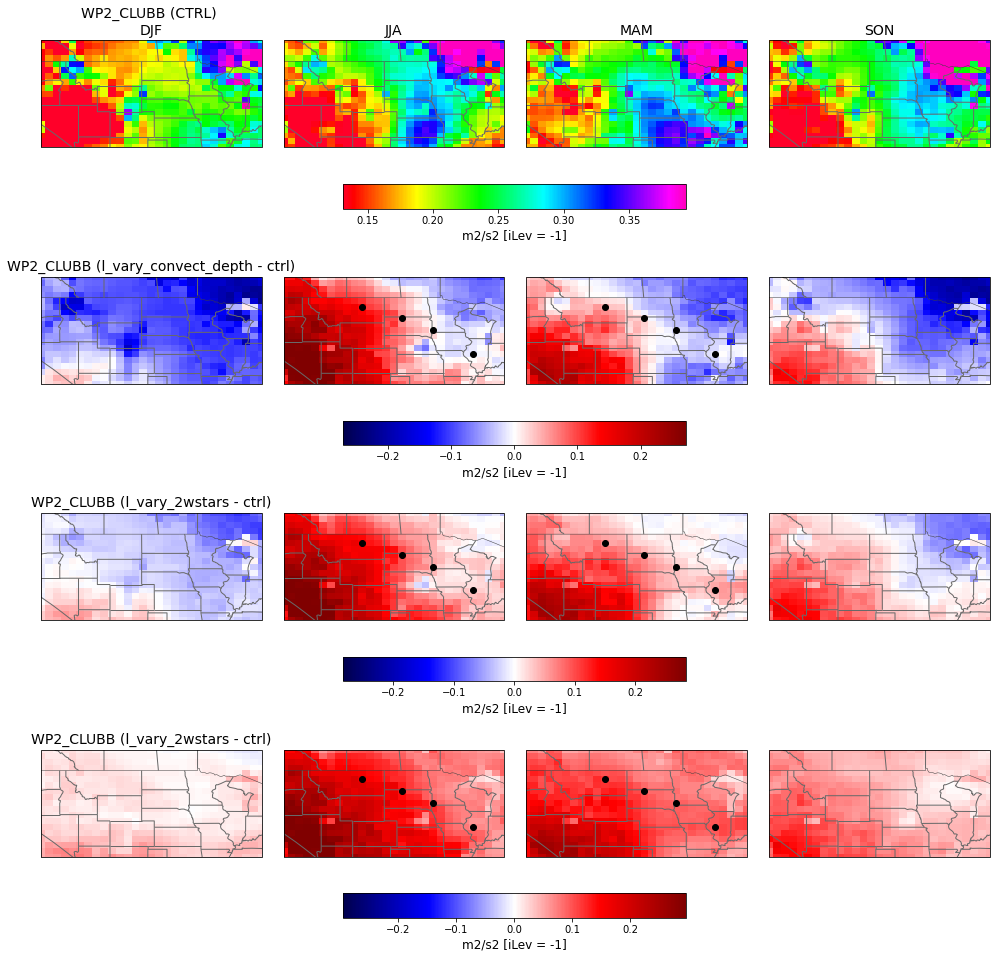

In [45]:
map_SeasonalDifferences(ctrlDS_seasonal, 
                        lvaryDS_seasonal, 
                        wstar2DS_seasonal,
                        wstarRvrsDS_seasonal,
                        'WP2_CLUBB', -1, 
                        '(l_vary_convect_depth - ctrl)',
                        '(l_vary_2wstars - ctrl)',
                        '(l_vary_RvrsWstars - ctrl)',
                         locSel)

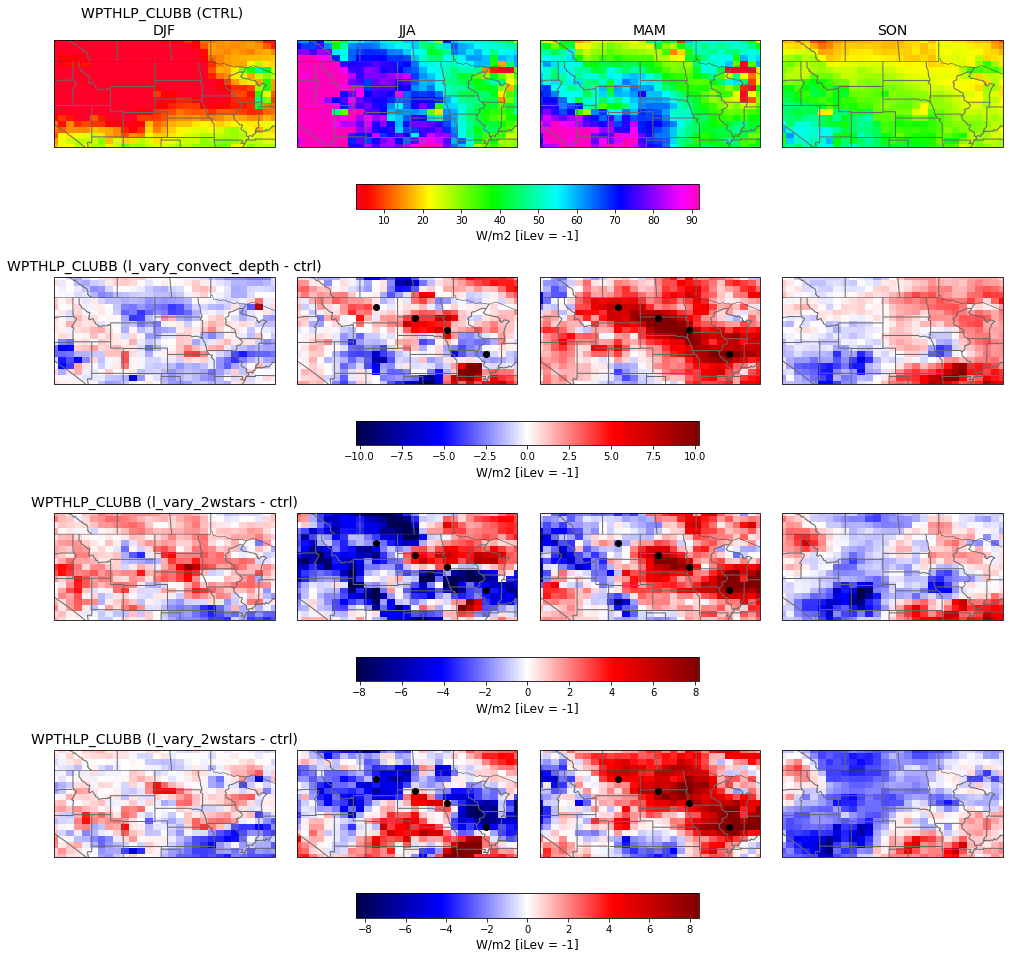

In [46]:
map_SeasonalDifferences(ctrlDS_seasonal, 
                        lvaryDS_seasonal, 
                        wstar2DS_seasonal,
                        wstarRvrsDS_seasonal,
                        'WPTHLP_CLUBB', -1, 
                        '(l_vary_convect_depth - ctrl)',
                        '(l_vary_2wstars - ctrl)',
                        '(l_vary_RvrsWstars - ctrl)',
                         locSel)



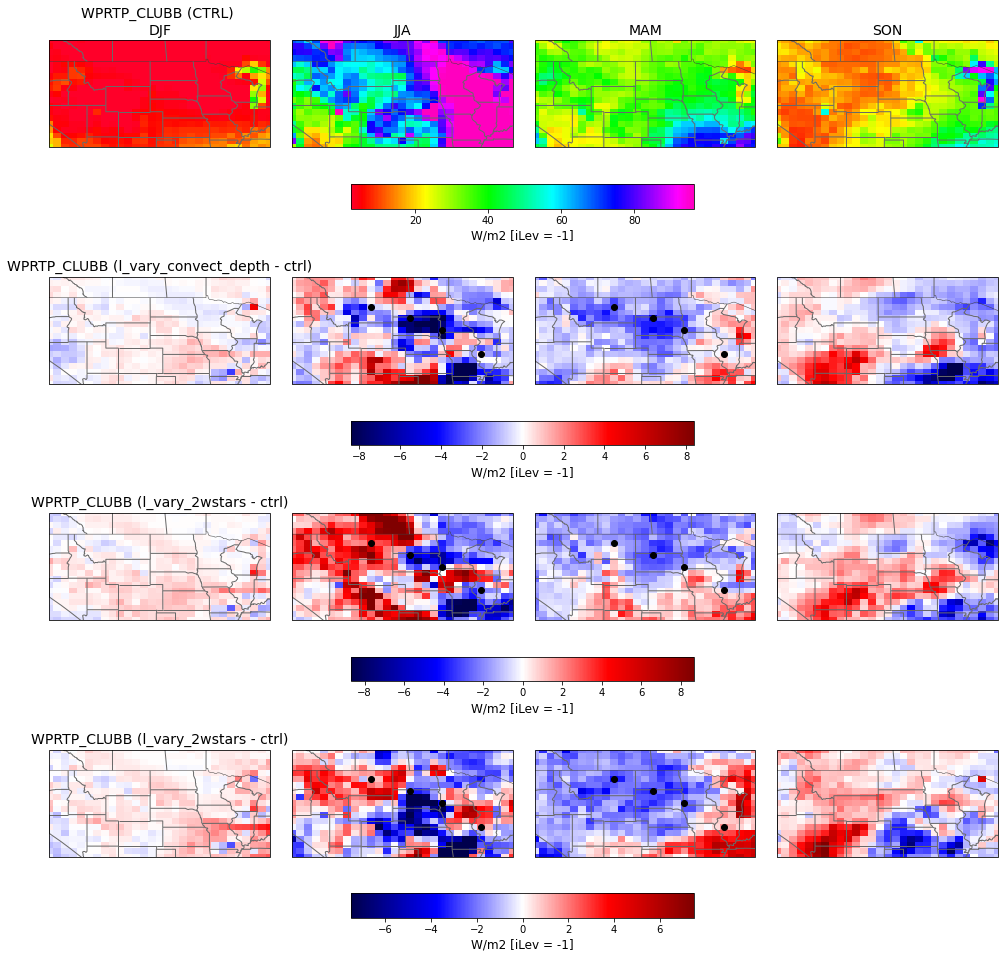

In [47]:
map_SeasonalDifferences(ctrlDS_seasonal, 
                        lvaryDS_seasonal, 
                        wstar2DS_seasonal,
                        wstarRvrsDS_seasonal,
                        'WPRTP_CLUBB', -1, 
                        '(l_vary_convect_depth - ctrl)',
                        '(l_vary_2wstars - ctrl)',
                        '(l_vary_RvrsWstars - ctrl)',
                         locSel)



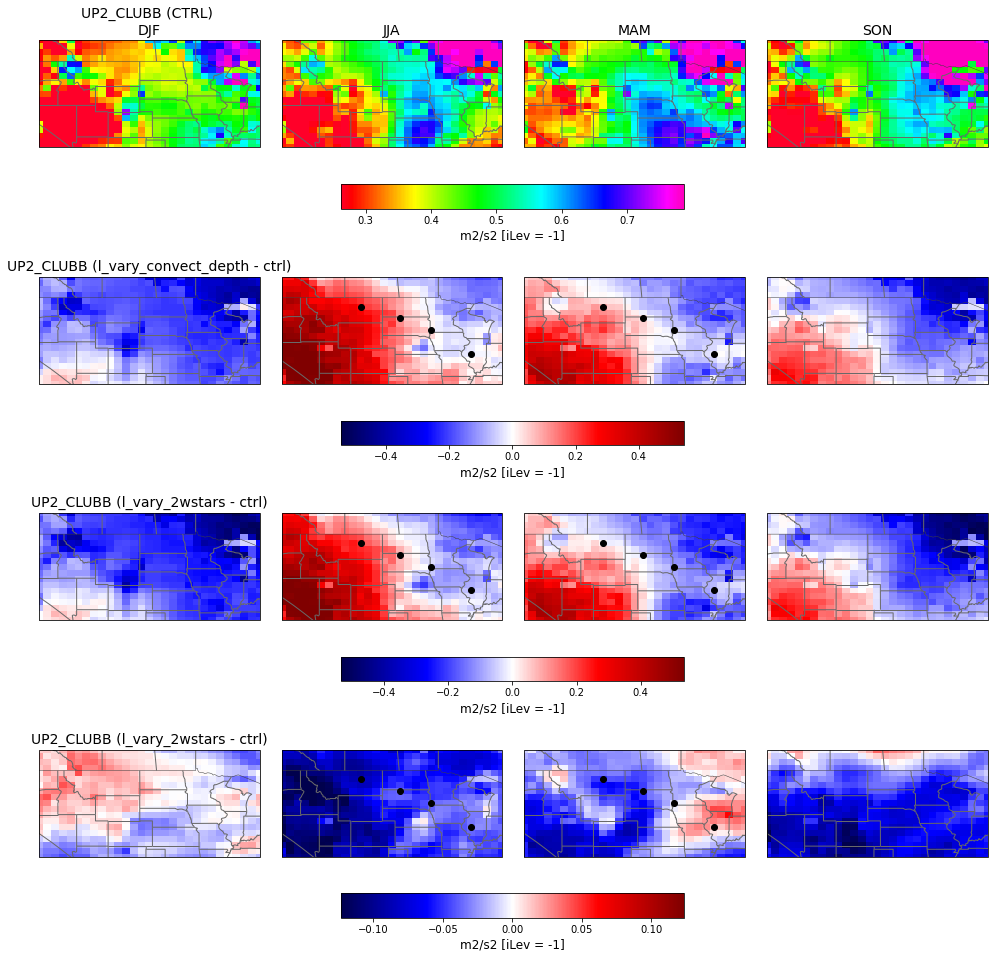

In [48]:
map_SeasonalDifferences(ctrlDS_seasonal, 
                        lvaryDS_seasonal, 
                        wstar2DS_seasonal,
                        wstarRvrsDS_seasonal,
                        'UP2_CLUBB', -1, 
                        '(l_vary_convect_depth - ctrl)',
                        '(l_vary_2wstars - ctrl)',
                        '(l_vary_RvrsWstars - ctrl)',
                         locSel)

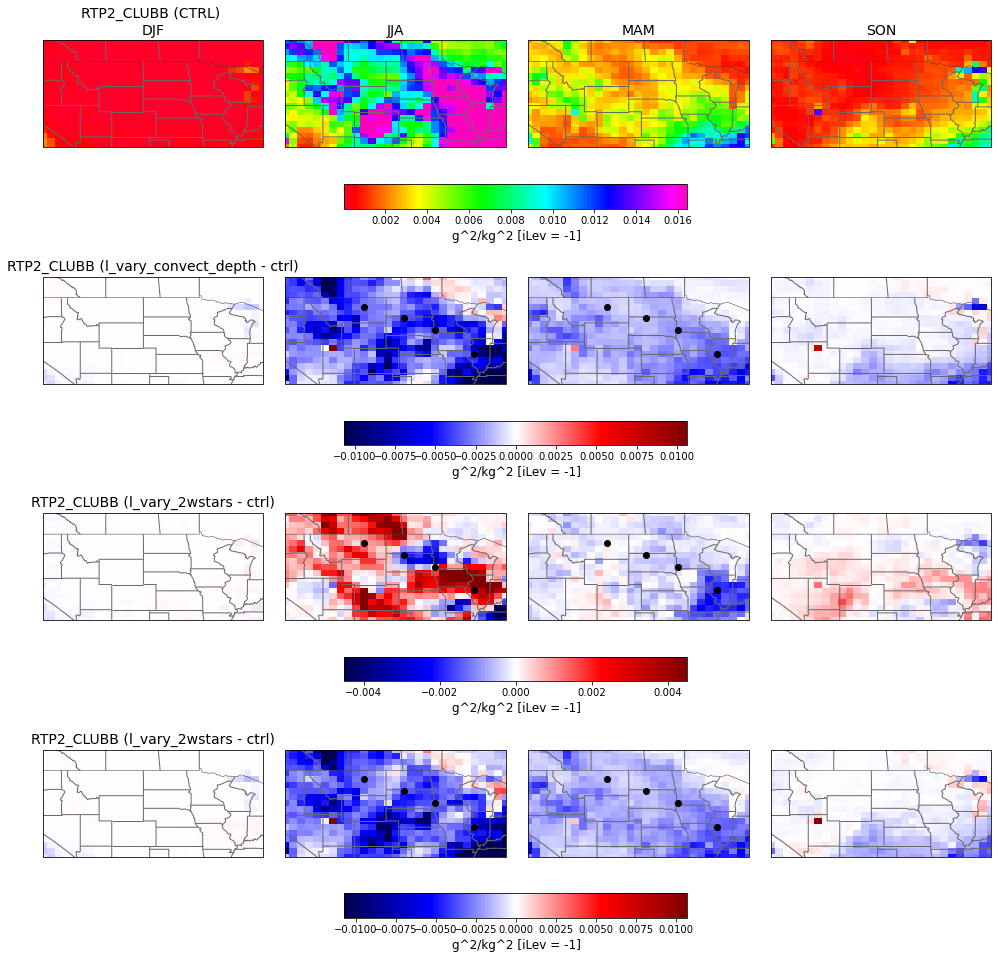

In [49]:
map_SeasonalDifferences(ctrlDS_seasonal, 
                        lvaryDS_seasonal, 
                        wstar2DS_seasonal,
                        wstarRvrsDS_seasonal,
                        'RTP2_CLUBB', -1, 
                        '(l_vary_convect_depth - ctrl)',
                        '(l_vary_2wstars - ctrl)',
                        '(l_vary_RvrsWstars - ctrl)',
                         locSel)

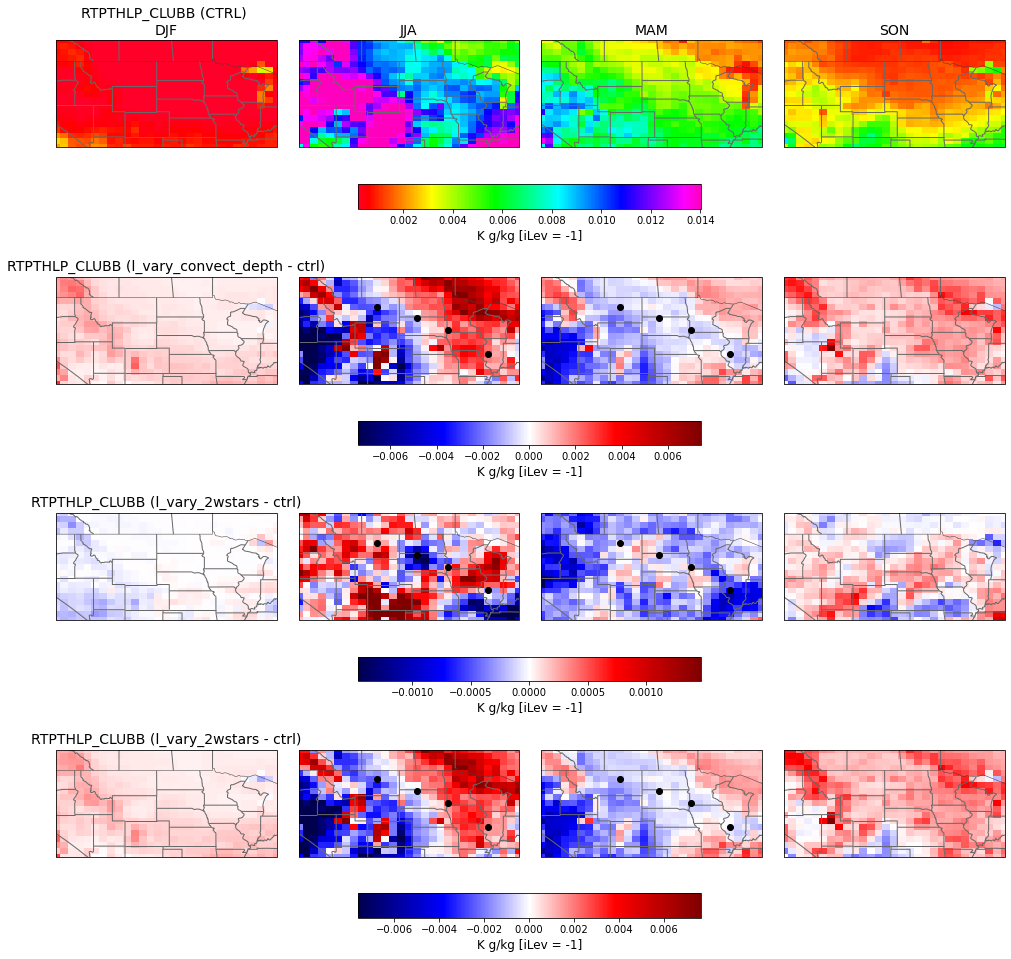

In [50]:
map_SeasonalDifferences(ctrlDS_seasonal, 
                        lvaryDS_seasonal, 
                        wstar2DS_seasonal,
                        wstarRvrsDS_seasonal,
                        'RTPTHLP_CLUBB', -1, 
                        '(l_vary_convect_depth - ctrl)',
                        '(l_vary_2wstars - ctrl)',
                        '(l_vary_RvrsWstars - ctrl)',
                         locSel)

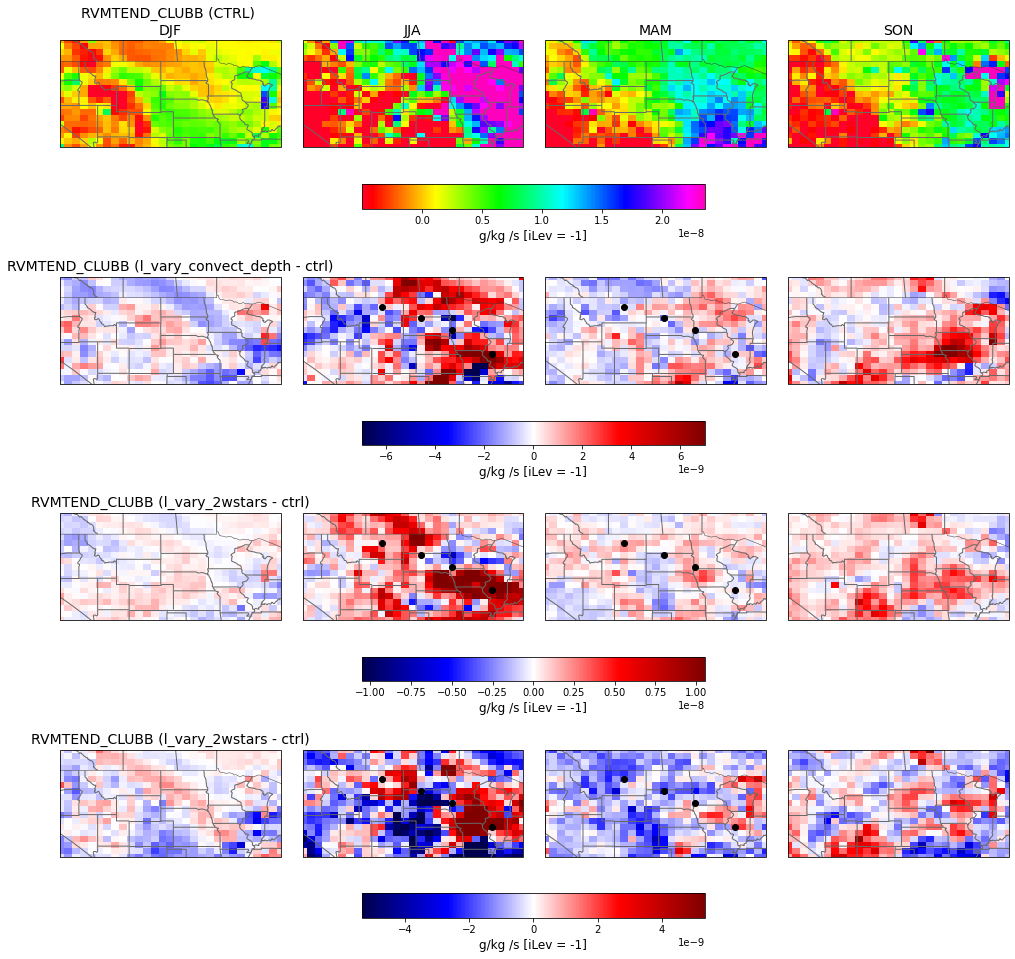

In [51]:
map_SeasonalDifferences(ctrlDS_seasonal, 
                        lvaryDS_seasonal, 
                        wstar2DS_seasonal,
                        wstarRvrsDS_seasonal,
                        'RVMTEND_CLUBB', -1, 
                        '(l_vary_convect_depth - ctrl)',
                        '(l_vary_2wstars - ctrl)',
                        '(l_vary_RvrsWstars - ctrl)',
                         locSel)

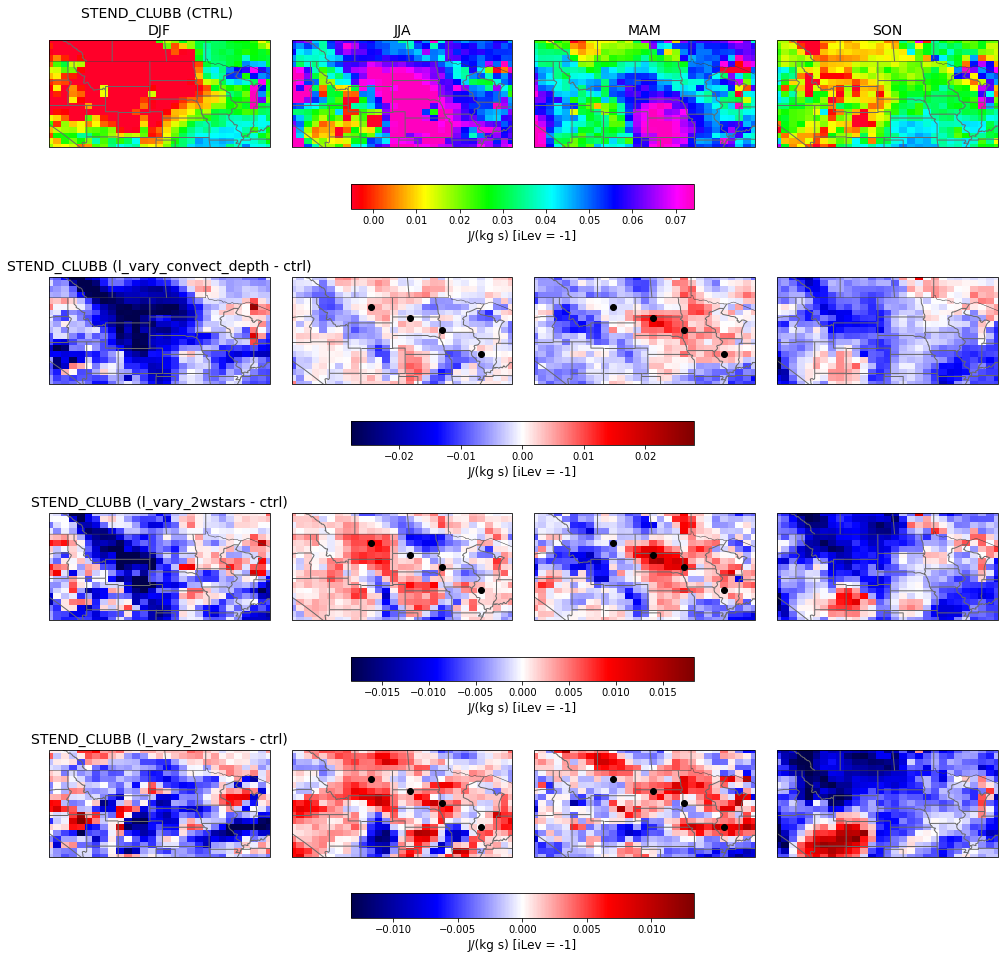

In [52]:
map_SeasonalDifferences(ctrlDS_seasonal, 
                        lvaryDS_seasonal, 
                        wstar2DS_seasonal,
                        wstarRvrsDS_seasonal,
                        'STEND_CLUBB', -1, 
                        '(l_vary_convect_depth - ctrl)',
                        '(l_vary_2wstars - ctrl)',
                        '(l_vary_RvrsWstars - ctrl)',
                         locSel)

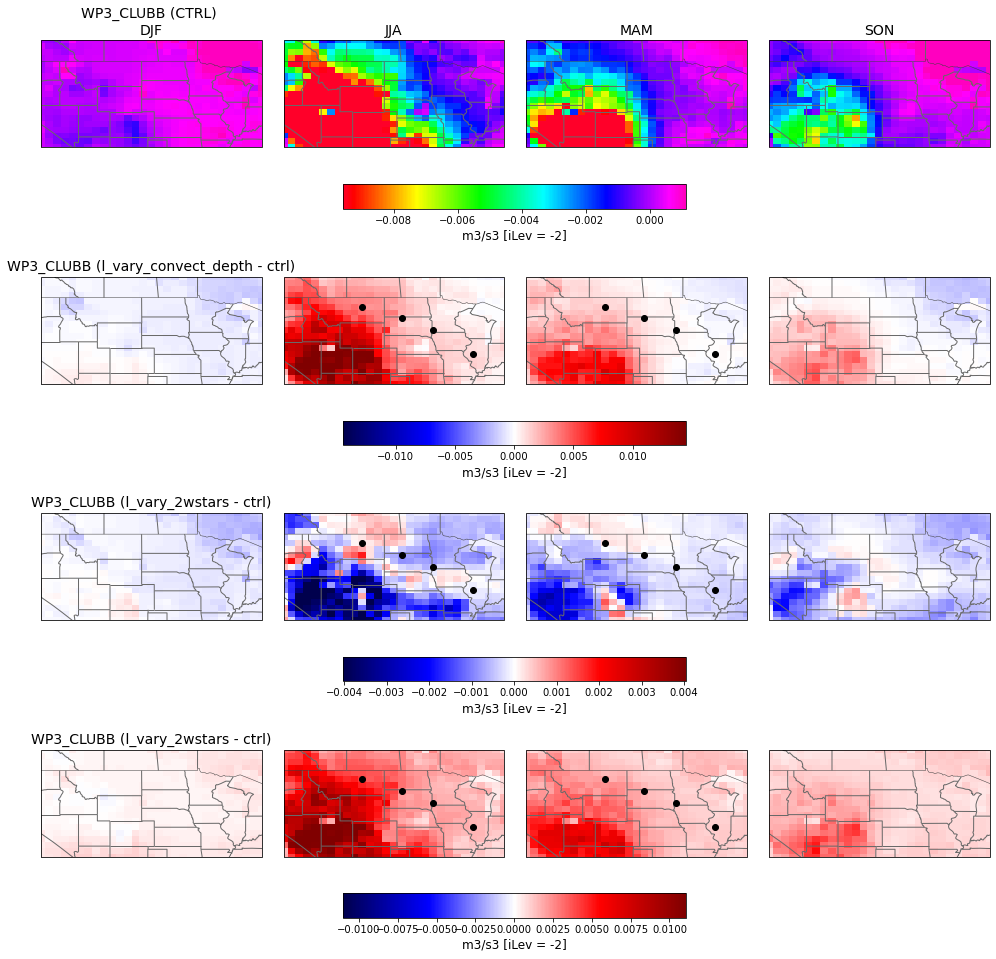

In [53]:
map_SeasonalDifferences(ctrlDS_seasonal, 
                        lvaryDS_seasonal, 
                        wstar2DS_seasonal,
                        wstarRvrsDS_seasonal,
                        'WP3_CLUBB', -2, 
                        '(l_vary_convect_depth - ctrl)',
                        '(l_vary_2wstars - ctrl)',
                        '(l_vary_RvrsWstars - ctrl)',
                         locSel)

## Vertical Profiles

To run with the US points, need to uncomment/define the lat/lon points, then in the plotting routines, increase the number of subplots from 2,3 to 2,4 and uncomment out the fourth plot. The lat/lon points to select will also need to be modified along with the names of each. 

In [82]:
def plot_verticalProfiles(ctlDS,testDS1,testDS2,testDS3,
                          varName,levName,
                          ind_levMin,ind_levMax,
                          ctrlLabel,test1Label,test2Label,test3Label, 
                          lonPoints, latPoints, placeNames, units):

    nLocations = len(latPoints)
    
    fig, axs = plt.subplots(2,nLocations, figsize=(15, 10), 
                        facecolor='w', edgecolor='k')
    axs = axs.ravel()
    
    for iLoc in range(nLocations):
        # Plot JJA
        axs[iLoc].plot(np.squeeze(ctlDS[varName].values[1,:,latPoints[iLoc],lonPoints[iLoc]]),
            ctlDS[levName].values,'k.-',label=ctrlLabel)
        axs[iLoc].plot(np.squeeze(testDS1[varName].values[1,:,latPoints[iLoc],lonPoints[iLoc]]),
            testDS1[levName].values,'b.-',label=test1Label)
        axs[iLoc].plot(np.squeeze(testDS2[varName].values[1,:,latPoints[iLoc],lonPoints[iLoc]]),
            testDS2[levName].values,'g.-',label=test2Label)
        axs[iLoc].plot(np.squeeze(testDS3[varName].values[1,:,latPoints[iLoc],lonPoints[iLoc]]),
            testDS3[levName].values,'.-',color='darkorange',label=test3Label)
        
        axs[iLoc].set_ylim([ind_levMin,ind_levMax])
        axs[iLoc].invert_yaxis()
      
        
        # Plot MAM
        axs[iLoc+nLocations].plot(np.squeeze(ctlDS[varName].values[2,:,latPoints[iLoc],lonPoints[iLoc]]),
            ctlDS[levName].values,'k.-',label=ctrlLabel)
        axs[iLoc+nLocations].plot(np.squeeze(testDS1[varName].values[2,:,latPoints[iLoc],lonPoints[iLoc]]),
            testDS1[levName].values,'b.-',label=test1Label)
        axs[iLoc+nLocations].plot(np.squeeze(testDS2[varName].values[2,:,latPoints[iLoc],lonPoints[iLoc]]),
            testDS2[levName].values,'g.-',label=test2Label)
        axs[iLoc+nLocations].plot(np.squeeze(testDS3[varName].values[2,:,latPoints[iLoc],lonPoints[iLoc]]),
            testDS3[levName].values,'.-',color='darkorange',label=test3Label)
    
        axs[iLoc+nLocations].set_ylim([ind_levMin,ind_levMax])
        axs[iLoc+nLocations].invert_yaxis()
        axs[iLoc+nLocations].set_xlabel(units,fontsize=12)
        
        # More axis control needed for certain variables 
        if varName=='T':
            axs[iLoc].set_xlim([291,302])
            axs[iLoc+nLocations].set_xlim([275,285])
        elif varName=='Q':
            axs[iLoc].set_xlim([0.006,0.017])
            axs[iLoc+nLocations].set_xlim([0.0027,0.0062])
        elif varName=='RELHUM':
            axs[iLoc].set_xlim([35,85])
            axs[iLoc+nLocations].set_xlim([35,85])
        
        # Set other plot labels
        if iLoc==0:
            axs[iLoc].legend()
            axs[iLoc].set_ylabel(levName+' [hPa]',fontsize=12)
            axs[iLoc+nLocations].set_ylabel(levName+' [hPa]',fontsize=12)
            
            axs[iLoc].set_title(varName+' [JJA]\n'+placeNames[iLoc],fontsize=14)
            axs[iLoc+nLocations].set_title('[MAM]',fontsize=14)
        else:
            axs[iLoc].set_title(placeNames[iLoc],fontsize=14)
            
    saveOption = 'True'
    if saveOption=='True':        
        figName = saveDir+'profiles_'+varName+'.png'
        plt.savefig(figName)
            
    
    plt.show()

In [64]:
if locSel=='SouthAmerica':
    # -----------------------------------------------
    # Points in South America:
    # -----------------------------------------------
    # First point: San Juaquin, Bolivia
    ilatPoint_Bolivia = np.where((ctrlDS_seasonal.lat.values>=-13.5) & (ctrlDS_seasonal.lat.values<=-12.5))[0]
    ilonPoint_Bolivia = np.where((ctrlDS_seasonal.lon.values>=294.5) & (ctrlDS_seasonal.lon.values<=296.0))[0]

    # Second point: Campos de Júlio, Brazil
    ilatPoint_Brazil = np.where((ctrlDS_seasonal.lat.values>=-14.3) & (ctrlDS_seasonal.lat.values<=-13.2))[0]
    ilonPoint_Brazil = np.where((ctrlDS_seasonal.lon.values>=300.2) & (ctrlDS_seasonal.lon.values<=301.3))[0]

    # Third point: ~Villa Del Rosario, Paraguay
    ilatPoint_Paraguay = np.where((ctrlDS_seasonal.lat.values>=-24.9) & (ctrlDS_seasonal.lat.values<=-24.0))[0]
    ilonPoint_Paraguay = np.where((ctrlDS_seasonal.lon.values>=302.2) & (ctrlDS_seasonal.lon.values<=303.3))[0]

    # Combine into arrays used for plotting function 
    lonPoints = np.asarray([ilonPoint_Bolivia, ilonPoint_Brazil, ilonPoint_Paraguay])
    latPoints = np.asarray([ilatPoint_Bolivia, ilatPoint_Brazil, ilatPoint_Paraguay])
    placeNames = ['Bolivia','Brazil','Paraguay']
    
elif locSel=='MidwestUS':
    #   First point: Siox Falls, South Dakota
    ilatPoint_SioxFalls = np.where((ctrlDS_seasonal.lat.values>=42.9) & (ctrlDS_seasonal.lat.values<=44.1))[0]
    ilonPoint_SioxFalls = np.where((ctrlDS_seasonal.lon.values>=262.6) & (ctrlDS_seasonal.lon.values<=263.8))[0]

    # Second point: Jordan, Montana
    ilatPoint_Jordan = np.where((ctrlDS_seasonal.lat.values>=46.8) & (ctrlDS_seasonal.lat.values<=47.8))[0]
    ilonPoint_Jordan = np.where((ctrlDS_seasonal.lon.values>=252.5) & (ctrlDS_seasonal.lon.values<=253.5))[0]

    # Third point: Macomb/Galesburg, Illinois
    ilatPoint_Galesburg = np.where((ctrlDS_seasonal.lat.values>=40.0) & (ctrlDS_seasonal.lat.values<=40.9))[0]
    ilonPoint_Galesburg = np.where((ctrlDS_seasonal.lon.values>=269.1) & (ctrlDS_seasonal.lon.values<=270.1))[0]

    # Fourth point: Fort Yates, North Dakota
    ilatPoint_FortYates = np.where((ctrlDS_seasonal.lat.values>=45.5) & (ctrlDS_seasonal.lat.values<=46.5))[0]
    ilonPoint_FortYates = np.where((ctrlDS_seasonal.lon.values>=258.7) & (ctrlDS_seasonal.lon.values<=259.9))[0]

    # Combine into arrays used for plotting function 
    latPoints = np.asarray([ilatPoint_FortYates, ilatPoint_SioxFalls, ilatPoint_Jordan, ilatPoint_Galesburg])
    lonPoints = np.asarray([ilonPoint_FortYates, ilonPoint_SioxFalls, ilonPoint_Jordan, ilonPoint_Galesburg])
    placeNames = ['Fort Yates, ND','Sioux Falls, SD','Jordan, MT','Galesburg, IL']



In [60]:
# Labels for plotting function
ctrlLabel = 'CTRL'
test1Label = 'l_vary_convect_depth'
test2Label = ' 2 w*s (Dyn)'
test3Label = 'Rvrs w*s (Thermo)'


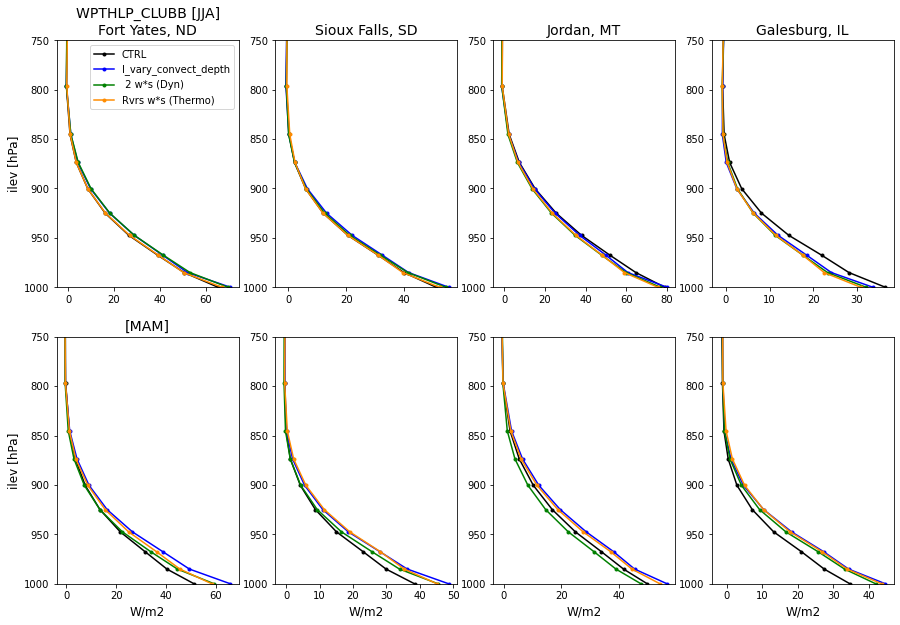

In [65]:
ind_levMin = 750
ind_levMax = 1000
varName    = 'WPTHLP_CLUBB'

plot_verticalProfiles(ctrlDS_seasonal,lvaryDS_seasonal,wstar2DS_seasonal,wstarRvrsDS_seasonal,
                      varName,'ilev',
                      ind_levMin,ind_levMax,
                      ctrlLabel,test1Label,test2Label,test3Label, 
                      lonPoints, latPoints, placeNames, ctrlDS[varName].units)



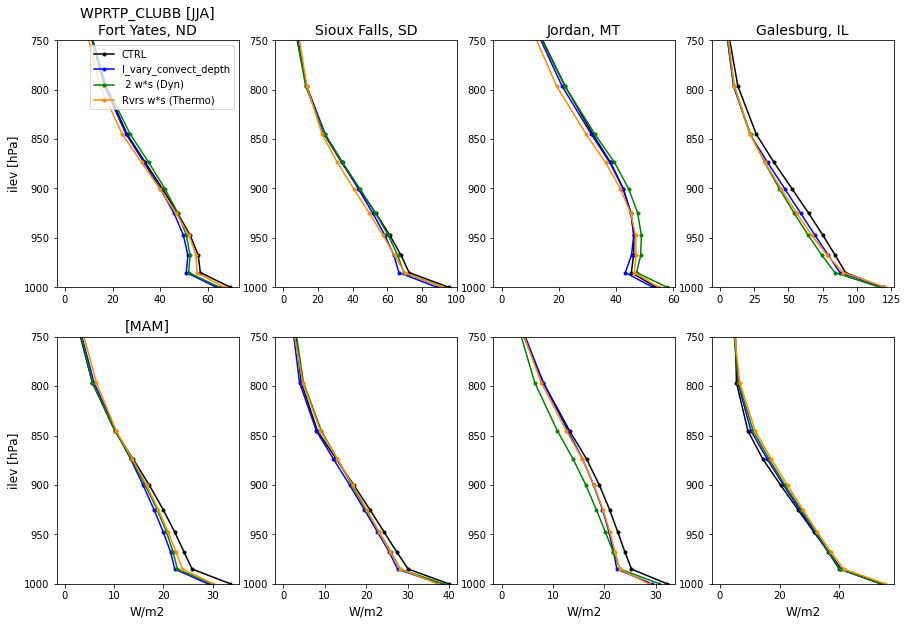

In [66]:
ind_levMin = 750
ind_levMax = 1000
varName    = 'WPRTP_CLUBB'

plot_verticalProfiles(ctrlDS_seasonal,lvaryDS_seasonal,wstar2DS_seasonal,wstarRvrsDS_seasonal,
                      varName,'ilev',
                      ind_levMin,ind_levMax,
                      ctrlLabel,test1Label,test2Label,test3Label, 
                      lonPoints, latPoints, placeNames, ctrlDS[varName].units)


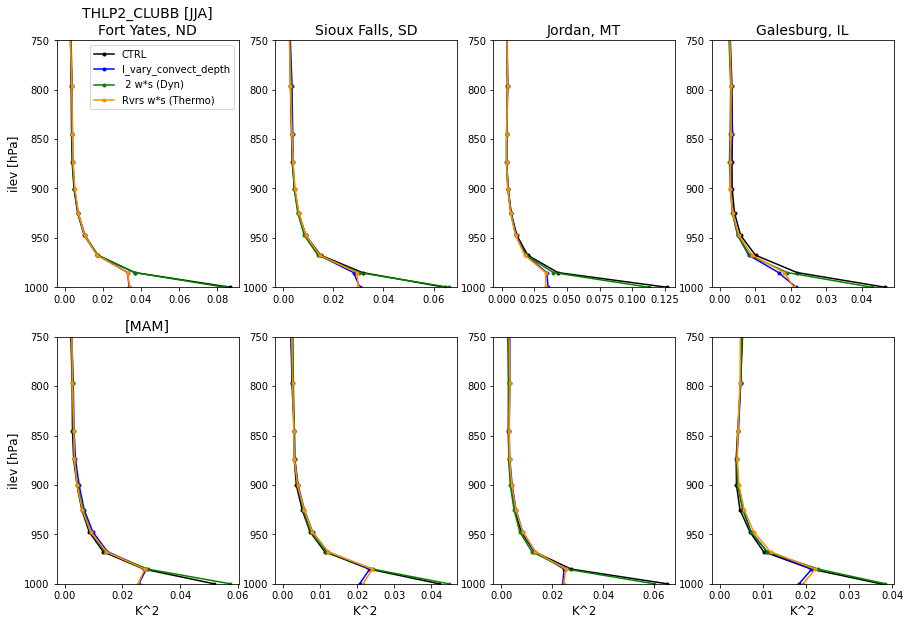

In [67]:
ind_levMin = 750
ind_levMax = 1000
varName    = 'THLP2_CLUBB'

plot_verticalProfiles(ctrlDS_seasonal,lvaryDS_seasonal,wstar2DS_seasonal,wstarRvrsDS_seasonal,
                      varName,'ilev',
                      ind_levMin,ind_levMax,
                      ctrlLabel,test1Label,test2Label,test3Label, 
                      lonPoints, latPoints, placeNames, ctrlDS[varName].units)



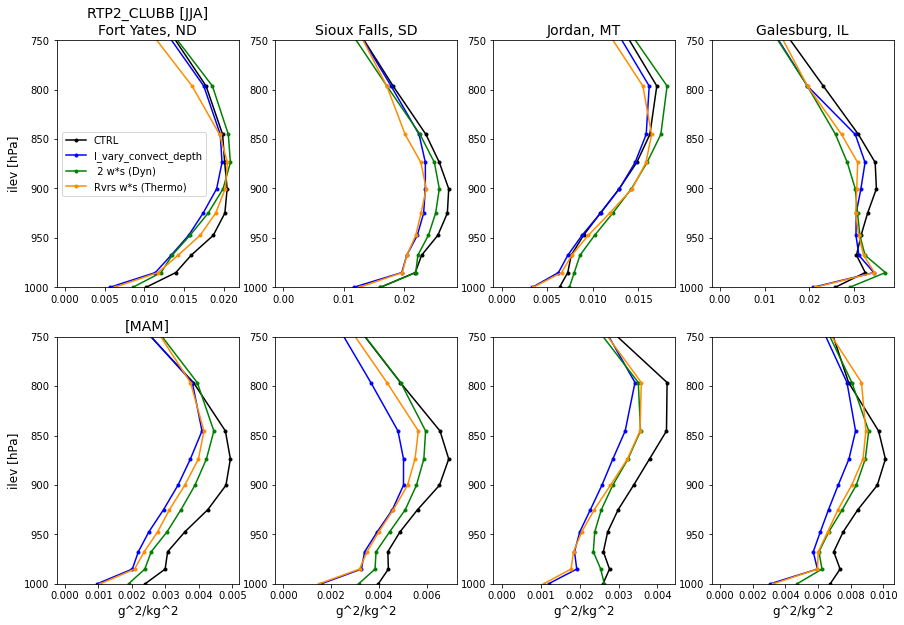

In [68]:
ind_levMin = 750
ind_levMax = 1000
varName    = 'RTP2_CLUBB'

plot_verticalProfiles(ctrlDS_seasonal,lvaryDS_seasonal,wstar2DS_seasonal,wstarRvrsDS_seasonal,
                      varName,'ilev',
                      ind_levMin,ind_levMax,
                      ctrlLabel,test1Label,test2Label,test3Label, 
                      lonPoints, latPoints, placeNames, ctrlDS[varName].units)




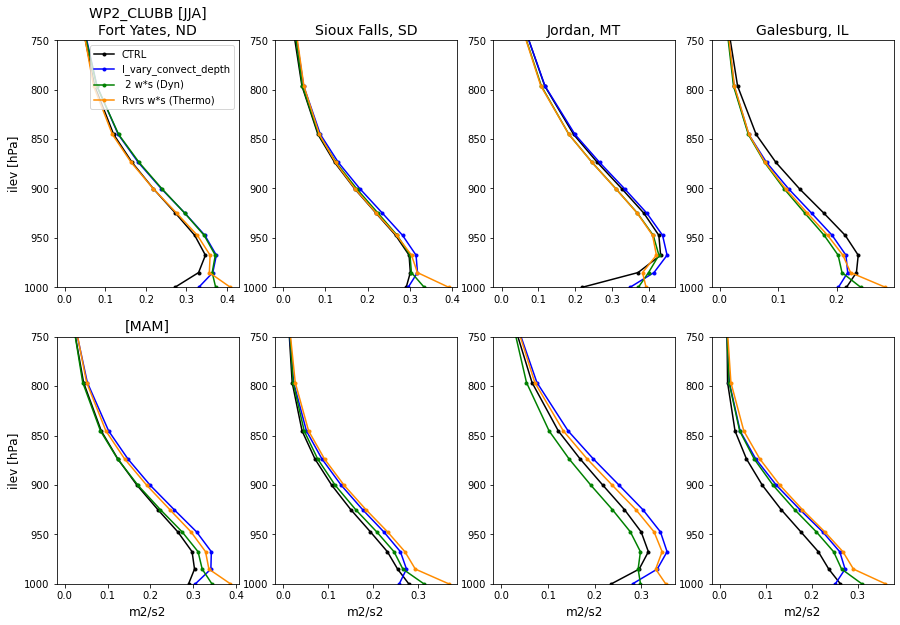

In [69]:
ind_levMin = 750
ind_levMax = 1000
varName    = 'WP2_CLUBB'

plot_verticalProfiles(ctrlDS_seasonal,lvaryDS_seasonal,wstar2DS_seasonal,wstarRvrsDS_seasonal,
                      varName,'ilev',
                      ind_levMin,ind_levMax,
                      ctrlLabel,test1Label,test2Label,test3Label, 
                      lonPoints, latPoints, placeNames, ctrlDS[varName].units)


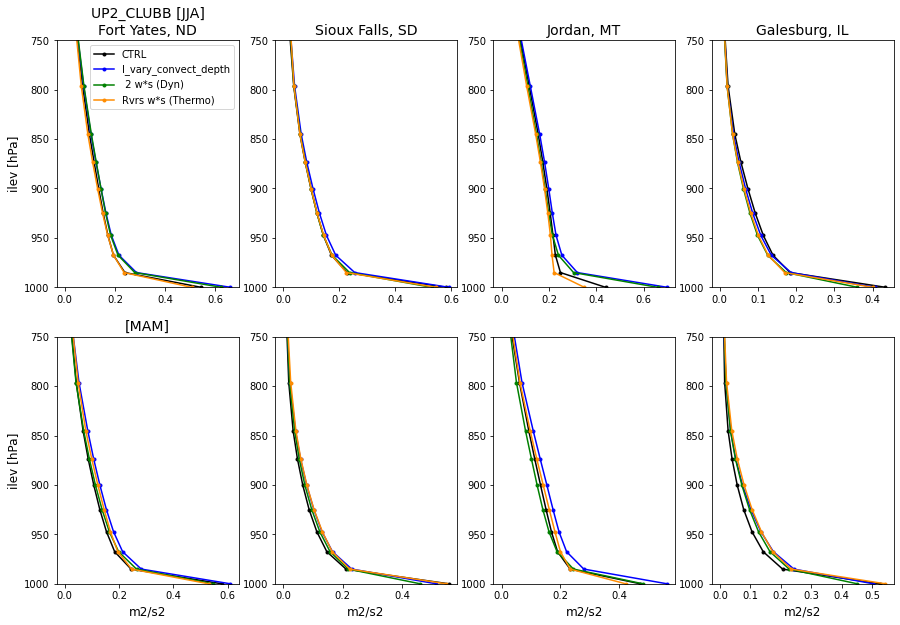

In [70]:
ind_levMin = 750
ind_levMax = 1000
varName    = 'UP2_CLUBB'

plot_verticalProfiles(ctrlDS_seasonal,lvaryDS_seasonal,wstar2DS_seasonal,wstarRvrsDS_seasonal,
                      varName,'ilev',
                      ind_levMin,ind_levMax,
                      ctrlLabel,test1Label,test2Label,test3Label, 
                      lonPoints, latPoints, placeNames, ctrlDS[varName].units)


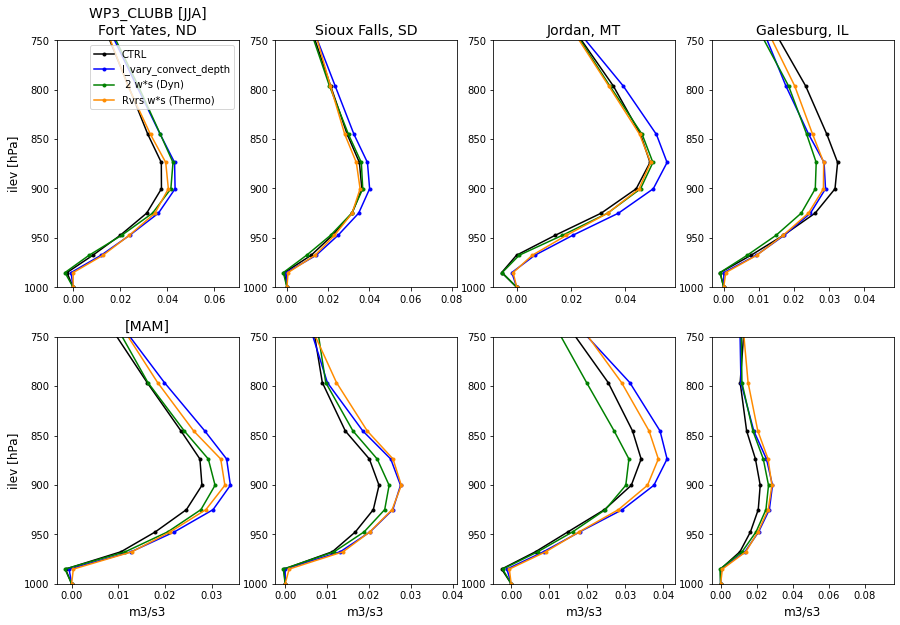

In [71]:
ind_levMin = 750
ind_levMax = 1000
varName    = 'WP3_CLUBB'

plot_verticalProfiles(ctrlDS_seasonal,lvaryDS_seasonal,wstar2DS_seasonal,wstarRvrsDS_seasonal,
                      varName,'ilev',
                      ind_levMin,ind_levMax,
                      ctrlLabel,test1Label,test2Label,test3Label, 
                      lonPoints, latPoints, placeNames, ctrlDS[varName].units)


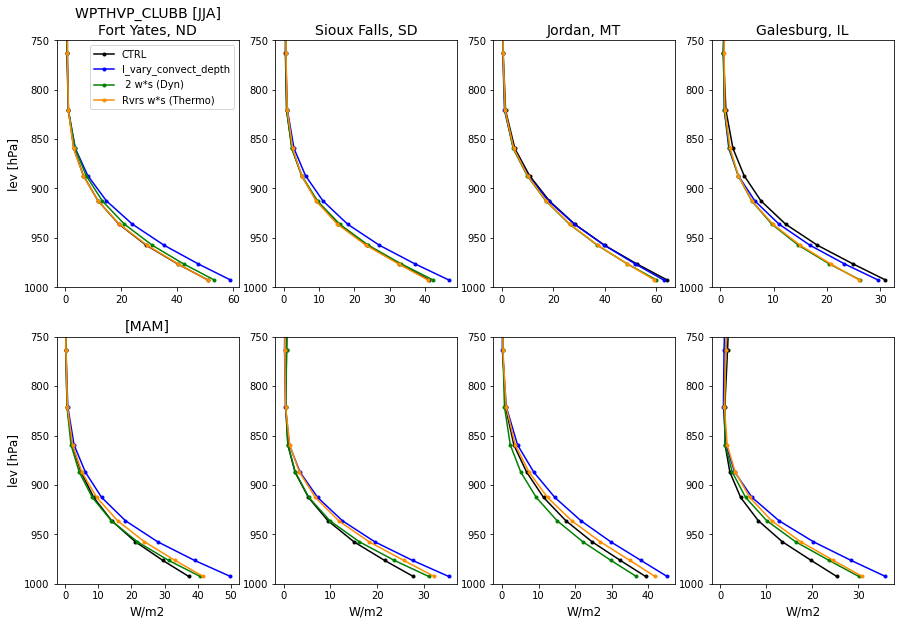

In [72]:
ind_levMin = 750
ind_levMax = 1000
varName    = 'WPTHVP_CLUBB'

plot_verticalProfiles(ctrlDS_seasonal,lvaryDS_seasonal,wstar2DS_seasonal,wstarRvrsDS_seasonal,
                      varName,'lev',
                      ind_levMin,ind_levMax,
                      ctrlLabel,test1Label,test2Label,test3Label, 
                      lonPoints, latPoints, placeNames, ctrlDS[varName].units)



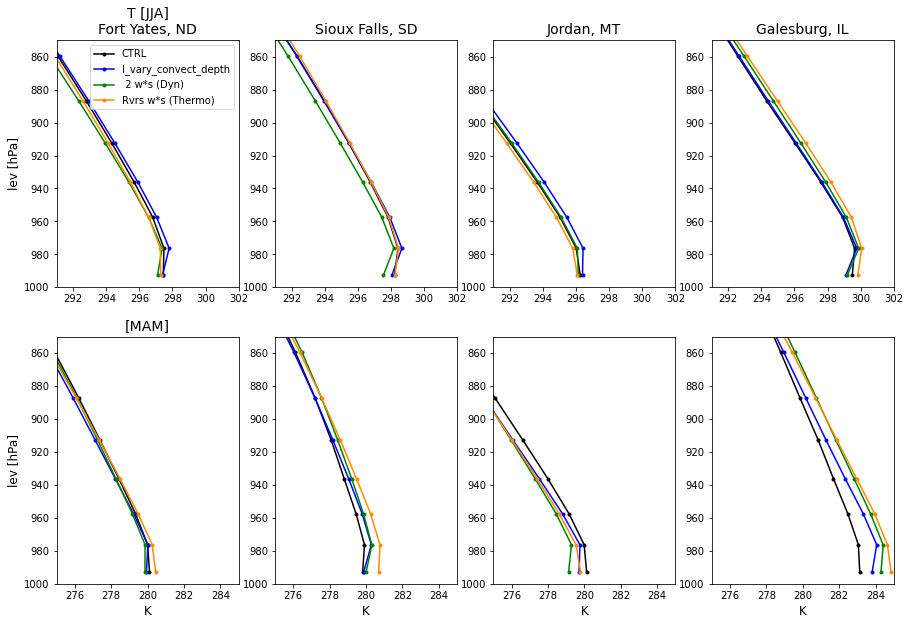

In [79]:
ind_levMin = 850
ind_levMax = 1000
varName    = 'T'

plot_verticalProfiles(ctrlDSother_seasonal,lvaryDSother_seasonal,wstar2DSother_seasonal,wstarRvrsDSother_seasonal,
                      varName,'lev',
                      ind_levMin,ind_levMax,
                      ctrlLabel,test1Label,test2Label,test3Label, 
                      lonPoints, latPoints, placeNames, ctrlDS_other[varName].units)



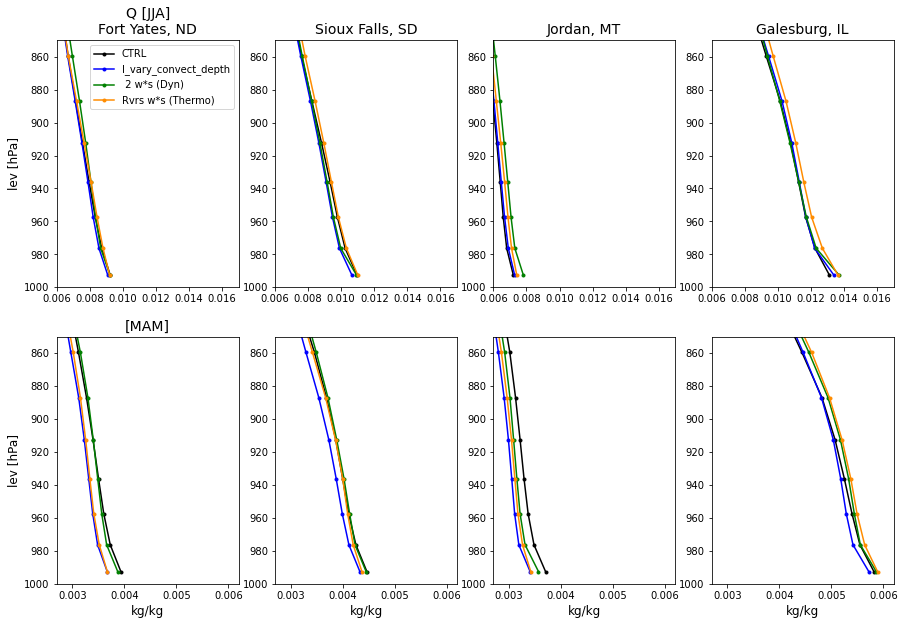

In [83]:
ind_levMin = 850
ind_levMax = 1000
varName    = 'Q'

plot_verticalProfiles(ctrlDSother_seasonal,lvaryDSother_seasonal,wstar2DSother_seasonal,wstarRvrsDSother_seasonal,
                      varName,'lev',
                      ind_levMin,ind_levMax,
                      ctrlLabel,test1Label,test2Label,test3Label, 
                      lonPoints, latPoints, placeNames, ctrlDS_other[varName].units)



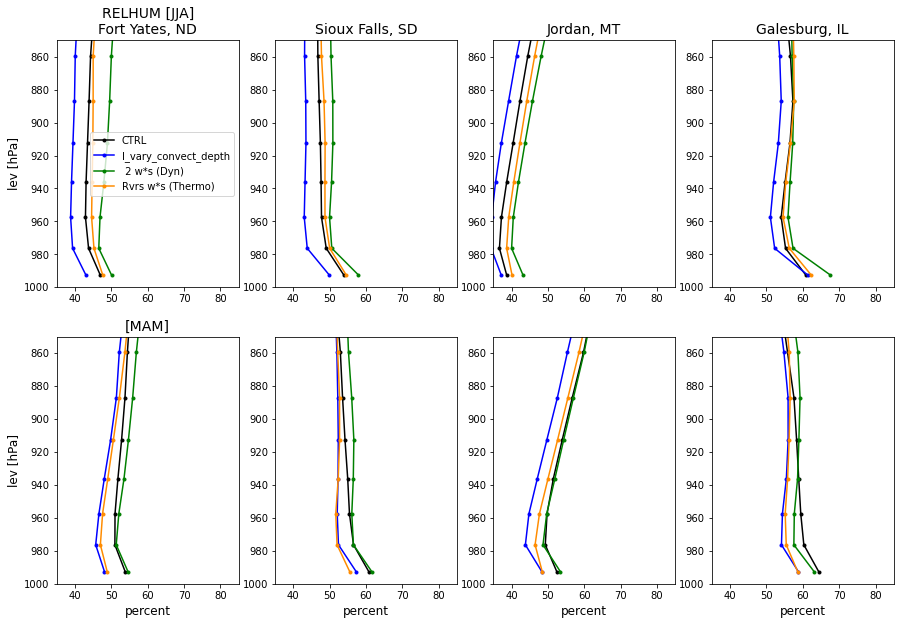

In [84]:
ind_levMin = 850
ind_levMax = 1000
varName    = 'RELHUM'

plot_verticalProfiles(ctrlDSother_seasonal,lvaryDSother_seasonal,wstar2DSother_seasonal,wstarRvrsDSother_seasonal,
                      varName,'lev',
                      ind_levMin,ind_levMax,
                      ctrlLabel,test1Label,test2Label,test3Label, 
                      lonPoints, latPoints, placeNames, ctrlDS_other[varName].units)

